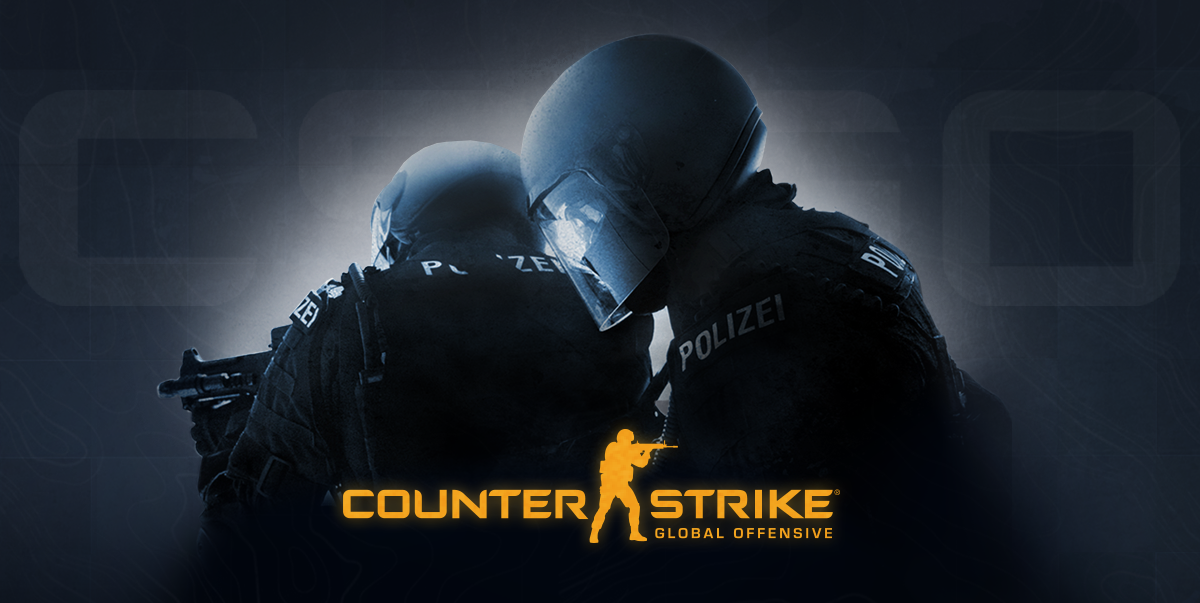

# Introduction

__Counter-Strike: Global Offensive__ (CS:GO) is a 2012 multiplayer tactical first-person shooter developed by Valve and Hidden Path Entertainment. It is the fourth game in the Counter-Strike series, where two teams (CT and Terrorist) play for a best of 30 rounds, with each round being 1 minute and 55 seconds. There are 5 players on each team (10 in total) and the first team to reach 16 rounds wins the game. At the start, one team plays as CT and the other as Terrorist. After 15 rounds played, the teams swap side. There are 7 different maps a game can be played on. You win a round as Terrorist by either planting the bomb and making sure it explodes, or by eliminating the other team. You win a round as CT by either eliminating the other team, or by disarming the bomb, should it have been planted.

The data set consists of ~700 demos from high level tournament play in 2019 and 2020. The total number of snapshots is 122411. This notebook uses a Keres DNN with a Tensorflow backend to predict round winners, either Counter-Terrorist or Terrorist.
Source: https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification



__My main goal is to analyze the main parameters that can increase the chances of winning and to train a machine learning model to predict winning:__

In [38]:
# Necessary imports for first part

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
%matplotlib inline

## Loading and checking the data 

In [2]:
df = pd.read_csv('../Projekt zaliczeniowy/Data Set/csgo_round_snapshots.csv')
print(f"Data contains {len(df.axes[0])} rows and {len(df.axes[1])} columns")

Data contains 122410 rows and 97 columns


In [3]:
# Printing first 5 rows
df.head(5)

time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00       0.0      0.0  de_dust2         False      500.0     500.0   
1     156.03       0.0      0.0  de_dust2         False      500.0     500.0   
2      96.03       0.0      0.0  de_dust2         False      391.0     400.0   
3      76.03       0.0      0.0  de_dust2         False      391.0     400.0   
4     174.97       1.0      0.0  de_dust2         False      500.0     500.0   

   ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
0       0.0      0.0    4000.0  ...                  0.0   
1     400.0    300.0     600.0  ...                  0.0   
2     294.0    200.0     750.0  ...                  0.0   
3     294.0    200.0     750.0  ...                  0.0   
4     192.0      0.0   18350.0  ...                  0.0   

   ct_grenade_smokegrenade  t_grenade_smokegrenade  \
0                      0.0                     0.0   
1                      0.0                     2.0   
2                      0.0                     2.0   
3                      0.0                     0.0   
4                      0.0                     0.0   

   ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                          0.0   

   ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   ct_grenade_decoygrenade  t_grenade_decoygrenade  round_winner  
0                      0.0                     0.0            CT  
1                      0.0                     0.0            CT  
2                      0.0                     0.0            CT  
3                      0.0                     0.0            CT  
4                      0.0                     0.0            CT  

[5 rows x 97 columns]

In [4]:
# Checking for null values
df.isnull().values.any()

False

- No null values in whole data set

In [5]:
# Name of all columns
df.columns.values

array(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted',
       'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money',
       't_money', 'ct_helmets', 't_helmets', 'ct_defuse_kits',
       'ct_players_alive', 't_players_alive', 'ct_weapon_ak47',
       't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug', 'ct_weapon_awp',
       't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s',
       't_weapon_m4a1s', 'ct_weapon_m4a4', 't_weapon_m4a4',
       'ct_weapon_mac10', 't_weapon_mac10', 'ct_weapon_mag7',
       't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_

In [6]:
# Checking data types
dict(df.dtypes)

{'time_left': dtype('float64'),
 'ct_score': dtype('float64'),
 't_score': dtype('float64'),
 'map': dtype('O'),
 'bomb_planted': dtype('bool'),
 'ct_health': dtype('float64'),
 't_health': dtype('float64'),
 'ct_armor': dtype('float64'),
 't_armor': dtype('float64'),
 'ct_money': dtype('float64'),
 't_money': dtype('float64'),
 'ct_helmets': dtype('float64'),
 't_helmets': dtype('float64'),
 'ct_defuse_kits': dtype('float64'),
 'ct_players_alive': dtype('float64'),
 't_players_alive': dtype('float64'),
 'ct_weapon_ak47': dtype('float64'),
 't_weapon_ak47': dtype('float64'),
 'ct_weapon_aug': dtype('float64'),
 't_weapon_aug': dtype('float64'),
 'ct_weapon_awp': dtype('float64'),
 't_weapon_awp': dtype('float64'),
 'ct_weapon_bizon': dtype('float64'),
 't_weapon_bizon': dtype('float64'),
 'ct_weapon_cz75auto': dtype('float64'),
 't_weapon_cz75auto': dtype('float64'),
 'ct_weapon_elite': dtype('float64'),
 't_weapon_elite': dtype('float64'),
 'ct_weapon_famas': dtype('float64'),
 't_wea

In [7]:
# Checking if there is not numeric data in column
list(df.select_dtypes(exclude=['float64']).columns)

['map', 'bomb_planted', 'round_winner']

 - 'Map' and 'bomb_planted' values must be encoded before machine learning, 'round_winner' is binary and it is what we are going to predict

In [8]:
# Check the description of the data set, what are maximum, minimum, mean, standard deviation value, total count
df.describe()

time_left       ct_score        t_score      ct_health  \
count  122410.000000  122410.000000  122410.000000  122410.000000   
mean       97.886922       6.709239       6.780435     412.106568   
std        54.465238       4.790362       4.823543     132.293290   
min         0.010000       0.000000       0.000000       0.000000   
25%        54.920000       3.000000       3.000000     350.000000   
50%        94.910000       6.000000       6.000000     500.000000   
75%       166.917500      10.000000      10.000000     500.000000   
max       175.000000      32.000000      33.000000     500.000000   

            t_health       ct_armor        t_armor       ct_money  \
count  122410.000000  122410.000000  122410.000000  122410.000000   
mean      402.714500     314.142121     298.444670    9789.023773   
std       139.919033     171.029736     174.576545   11215.042286   
min         0.000000       0.000000       0.000000       0.000000   
25%       322.000000     194.000000     174.000000    1300.000000   
50%       500.000000     377.000000     334.000000    5500.000000   
75%       500.000000     486.000000     468.000000   14600.000000   
max       600.000000     500.000000     500.000000   80000.000000   

             t_money     ct_helmets  ...  ct_grenade_flashbang  \
count  122410.000000  122410.000000  ...         122410.000000   
mean    11241.036680       2.053901  ...              1.853157   
std     12162.806759       1.841470  ...              1.772791   
min         0.000000       0.000000  ...              0.000000   
25%      1550.000000       0.000000  ...              0.000000   
50%      7150.000000       2.000000  ...              1.000000   
75%     18000.000000       4.000000  ...              3.000000   
max     80000.000000       5.000000  ...              7.000000   

       t_grenade_flashbang  ct_grenade_smokegrenade  t_grenade_smokegrenade  \
count        122410.000000            122410.000000           122410.000000   
mean              1.858100                 1.540814                1.627146   
std               1.794473                 1.737804                1.829147   
min               0.000000                 0.000000                0.000000   
25%               0.000000                 0.000000                0.000000   
50%               1.000000                 1.000000                1.000000   
75%               3.000000                 3.000000                3.000000   
max               7.000000                 6.000000                9.000000   

       ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
count                 122410.000000                122410.000000   
mean                       1.001969                     0.019819   
std                        1.458084                     0.143933   
min                        0.000000                     0.000000   
25%                        0.000000                     0.000000   
50%                        0.000000                     0.000000   
75%                        2.000000                     0.000000   
max                        5.000000                     3.000000   

       ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
count              122410.000000             122410.000000   
mean                    0.048011                  1.352095   
std                     0.227669                  1.663246   
min                     0.000000                  0.000000   
25%                     0.000000                  0.000000   
50%                     0.000000                  1.000000   
75%                     0.000000                  2.000000   
max                     3.000000                  5.000000   

       ct_grenade_decoygrenade  t_grenade_decoygrenade  
count            122410.000000           122410.000000  
mean                  0.027694                0.025750  
std                   0.169531                0.164162  
min                   0.000000                0.000000  
25%

- The features have different maximum level heights - must be scaled before machine learning

In [9]:
# Droping numeric columns where sum is equal to 0 (reducing DataFrame size)
cols_drop = list(df.select_dtypes(include=['float64']).loc[:, df.sum(axis=0) == 0].columns)
df.drop(columns=cols_drop, axis=1, inplace=True)
df.shape

(122410, 91)

## Exploratory data analysis (EDA):

### Which side won more often?

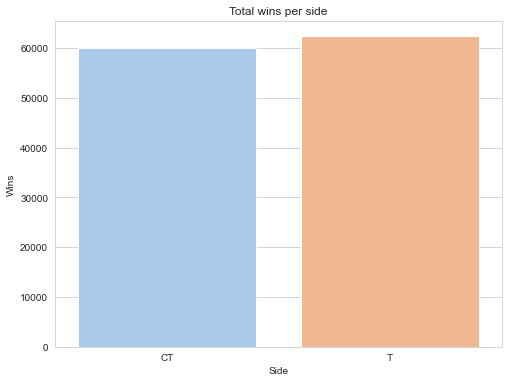

In [10]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='round_winner', data=df, palette='pastel')
ax.set(title='Total wins per side', xlabel='Side', ylabel='Wins')
plt.show();

- The chart above shows a slight but still advantage in total matches won by the Terrorist team

### Did the choice of map matter?

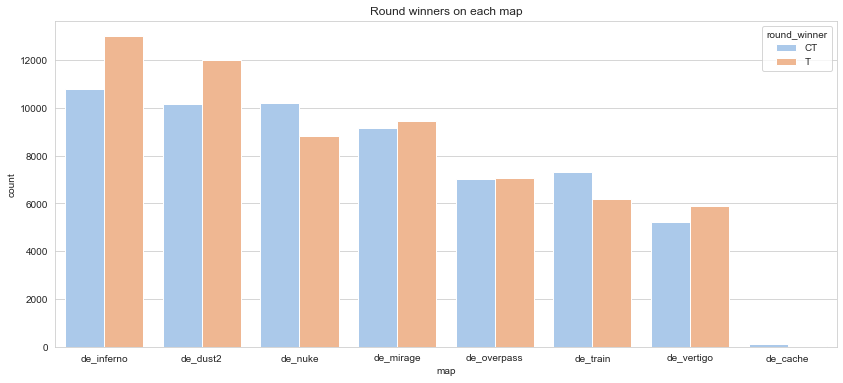

In [11]:
map_order = df['map'].value_counts().to_frame()

plt.figure(figsize=(14,6))
ax = sns.countplot(x="map", hue="round_winner", data=df, order=map_order.index, palette='pastel')
ax.set(title='Round winners on each map')
plt.show();

- The chart above shows the frequency of map selection (from highest to lowest) divided by the number of matches won by individual teams


- The most popular map is definitely "de_inferno" and "de_dust2" (maps that were also considerate as the most popular in earlier versions of the game). On both of them, matches are much more often won by Terrorist teams.


- The Counter Terrorist team had more wins on maps like "de_nuke", "de_train" and very similar odds on "de_mirage", "de_overpass".

### How often a C4 has been planted by Terrorist?

The C4 Explosive, commonly called simply the C4, is an objective equipment used in bomb defusal scenarios, exclusive to the Terrorists. At the beginning of every round, a random Terrorist will be given one C4 which enables posiblity to win round by planting and detonating the explosive. 

Let's check if this equipment is giving Terrorist upperhand for winning matches:

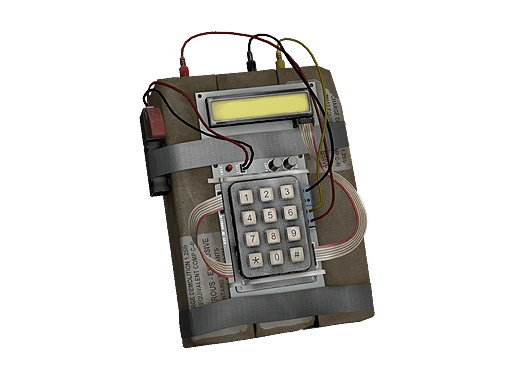

Graphic source: https://counterstrike.fandom.com/wiki/C4_Explosive

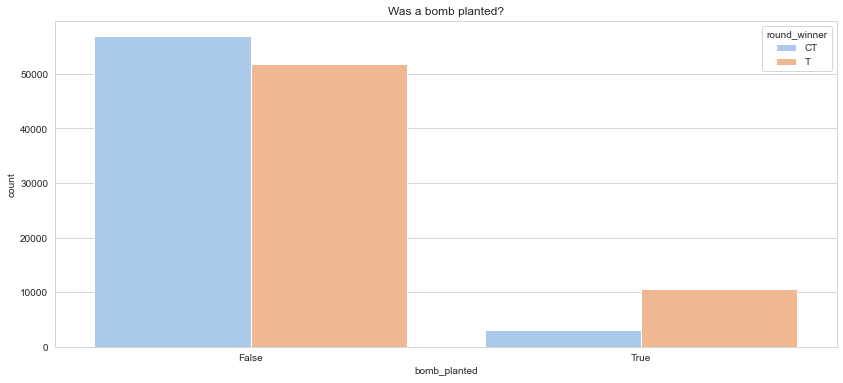

In [12]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='bomb_planted', hue='round_winner', data=df, palette='pastel')
ax.set(title='Was a bomb planted?')
plt.show();

- The graph above shows that in most games C4 was not planted at all. Also, based on the previous graph showing "Total Wins Per Side", we can conclude that the Terrorist team was mostly winning by eliminating the Counter-Terrorist team.


- Based on this graph, we can also conclude that if C4 was planted, the Terrorist team won the round much more often.

Let's see if the planted bomb ratio is similar on all maps:

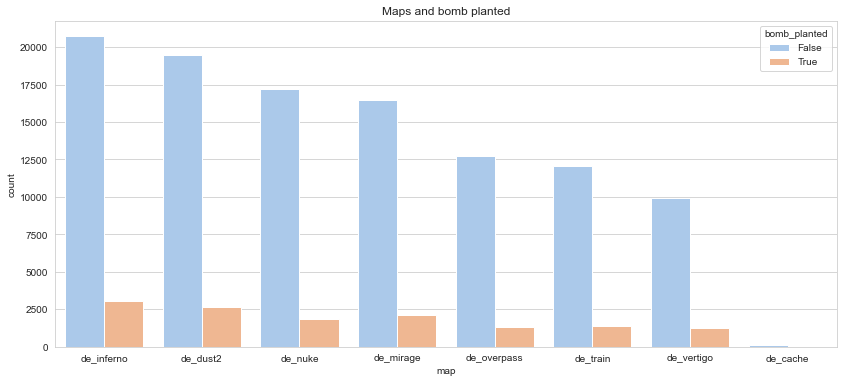

In [13]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x="map", hue="bomb_planted", data=df, order=map_order.index, palette='pastel')
ax.set(title='Maps and bomb planted')
plt.show();

- As before, on all maps, in the vast majority, the bomb was not planted at all.


- It is also interesting that, despite the fact that the first two maps are most often won by terrorists, they do not significantly differ in the proportion of bombs planted in the round to the rest of the maps.

### Did the possession of a defuse kit by Counter Terrorists affect the outcome of the match?

The Defuse Kit is a Counter-Terrorist exclusive equipment used to decrease the defuse time of bombs by half. It is very useful for quick defusion before time of the bomb runs out or smoke defuse tactics. 

Let's check if this equipment had impact in round victory:

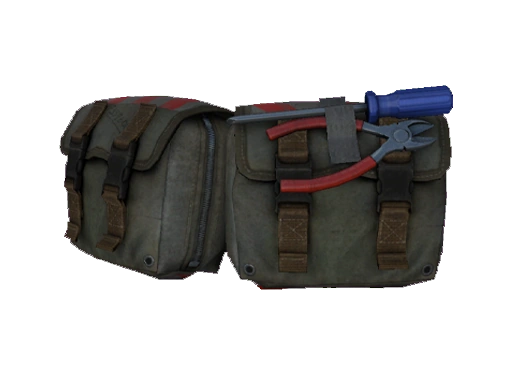

Graphic source: https://counterstrike.fandom.com/wiki/Defuse_Kit

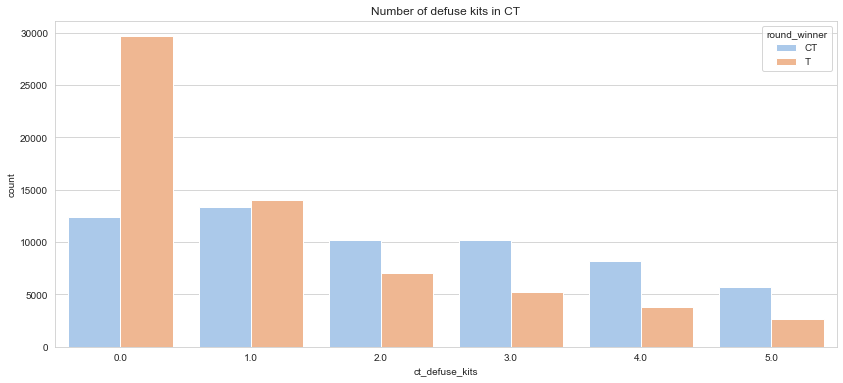

In [14]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='ct_defuse_kits', hue='round_winner', data=df, palette='pastel')
ax.set(title='Number of defuse kits in CT')
plt.show();

- From the chart above we can see that when CTs didn't buy a defuse kit, the Terrorists team won the round much more often. We also see that with only one set, the round won by Counter Terrorist vs Terrorists team ratio increased significantly, and with two sets gave them a much better chance of winning than the Terrorists. 


- As we know from previouse chart 'Was a bomb planted?', CTs did not have chance to use is often. This increasing win rate of games with at least one defuse kit may have been related to the greater financial resources that the CT team received after winning rounds. In addition to buying weapons and better equipment, the player may have had some money to spend and probably also decided to buy a defuse kit in case of planting a bomb.

### At what time_left intervals did the game end most often?

In [15]:
# Rounding time_left column and making intervals
df['time_left'].round(0).unique()
df['time_left_intervals'] = pd.cut(df['time_left'].round(), 6)
df['time_left_intervals'].value_counts()

(87.5, 116.667]       33881
(145.833, 175.0]      33715
(29.167, 58.333]      23263
(58.333, 87.5]        18318
(-0.175, 29.167]      13233
(116.667, 145.833]        0
Name: time_left_intervals, dtype: int64

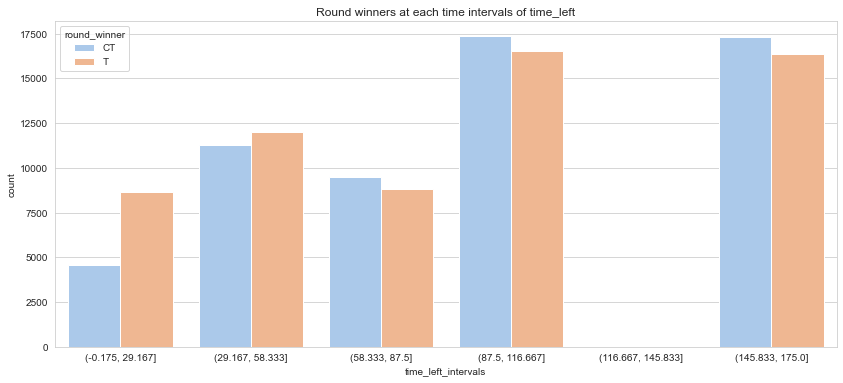

In [16]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x="time_left_intervals", hue="round_winner", data=df, palette='pastel')
ax.set(title='Round winners at each time intervals of time_left')
plt.show();

- High amount of matches ended up in the group 145.8-175 seconds and 87.5-116.5 seconds could probably acurre due to the quite popular tactic of quick attack and domination of one of the two bombsites by the Terrorist team or fake attack and rotate to other bombsite until first minute of the match. CTs don't know which of bombsites will be attacked in a given round so players from this team usually divide into pairs to defend and endure quite often a 4-5 man terrorist attack until the rest of their team arrives. It could have been thought that it is very succesful tactic aginst Counter Terrorist however, from the above charts we can notice that it did not guarantee a round win for Terrorist and even making it less probably to win.


- The group of 29 - 58.3 seconds and -0.175 to 29 second is also showing interesting outcome. Last minut before the end (especially 29 sec) is most often won by Terrorist team. This may be due to other used tactic - taking advantage of the pressure of running out of time by waiting until the last 30 - 50 seconds of the game and organizing a final attack with C4 plant that will not be able countered by the opposing team.

Let's check at what time intervals of time_left C4 was most often planted:

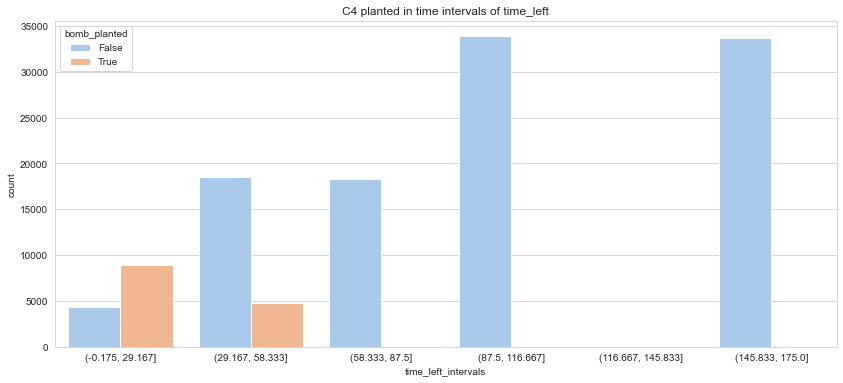

In [17]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x="time_left_intervals", hue="bomb_planted", data=df, palette='pastel')
ax.set(title='C4 planted in time intervals of time_left')
plt.show();

- C4 was most often planted in the group of 29 - 58.3 seconds and -0.175 to 29 which shows the use of pressure tactics of the Terrorist team.


- Previous and above chart also concludes that most of snapshot rounds in this data set were mostly finished due to one of team elimination.


### Did the choice of weapon matter?

Weapons are central to the combat in the Counter-Strike series, which players use to damage each other's health and kill enemy players to obtain kill rewards, gain tactical advantages, or progress to team elimination round victory. Every kind of gun have different parameters such as: hitscan, damage, headshot multiplier, rate of fire, armor penetration, pattern of recoil, price and many others. More information on: https://counterstrike.fandom.com/wiki/Weapons

Let's check what was the most popular weapon and grenade in avaliable data:

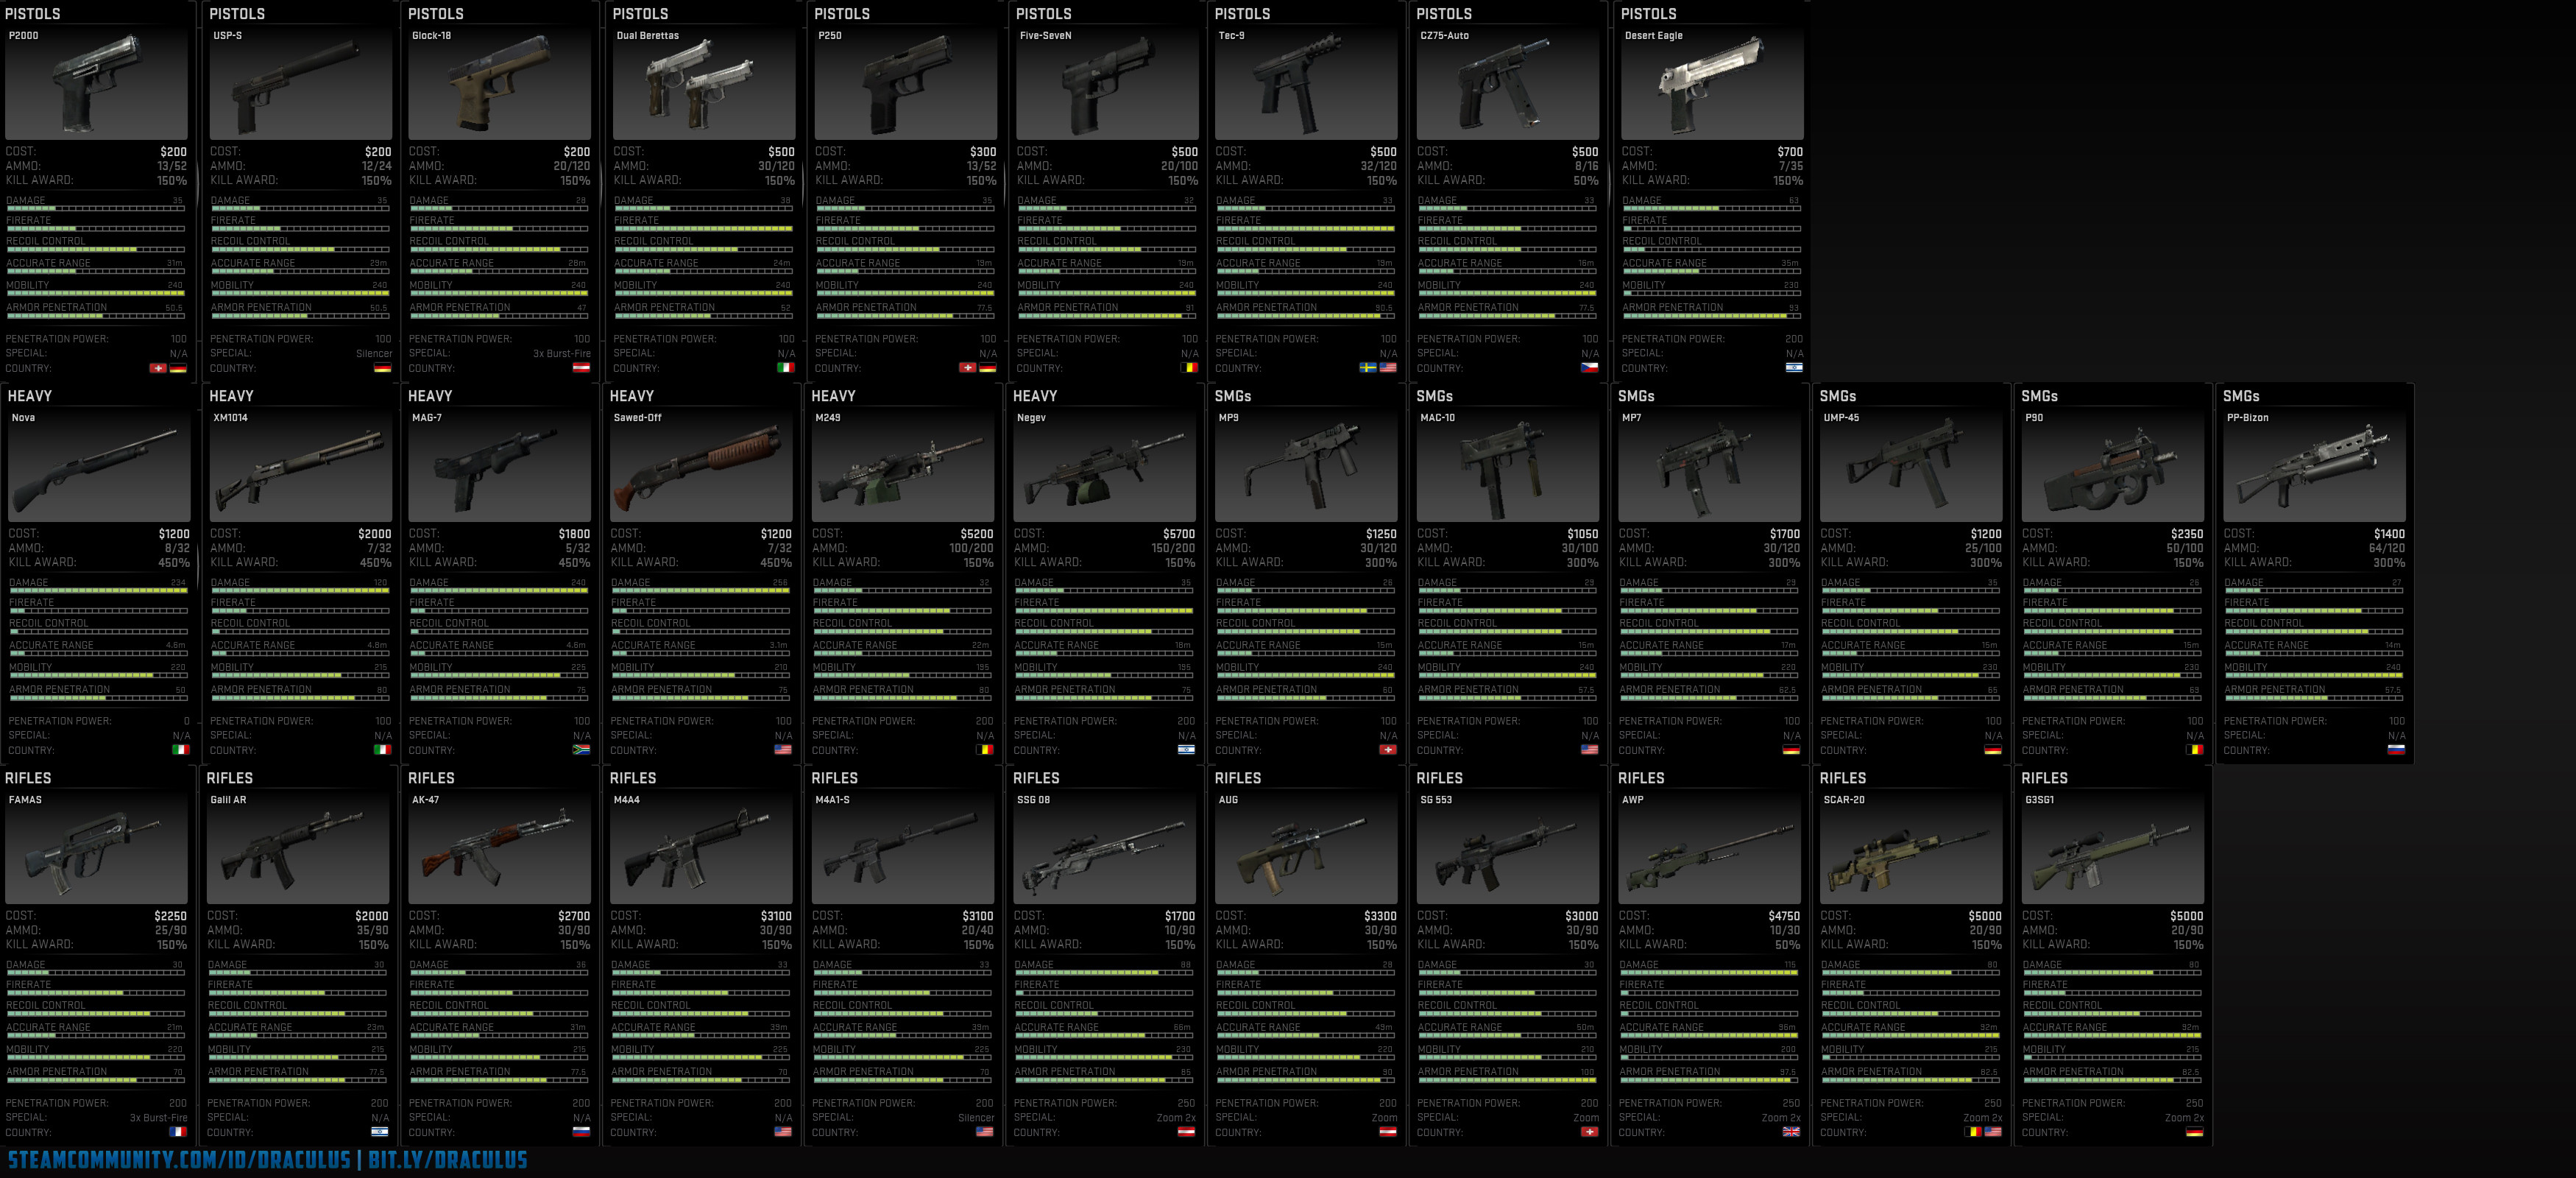

Source: https://external-preview.redd.it/mkZ_Yj4iBGskR3yym2NgtS_NBhu3F7EtDFGBa_SlQG8.jpg?width=1080&crop=smart&auto=webp&v=enabled&s=a4746ff99af293872c4fd5e7fbc69e9f1edc5106


https://www.reddit.com/r/GlobalOffensive/comments/2rrd0p/csgo_gun_comparison/

In [18]:
# Creating DataFrame containg only weapon columns

df_weapon = df.filter(regex = 'weapon').T
df_weapon['Total'] = df_weapon.sum(axis=1)
df_weapon = df_weapon.sort_values('Total', ascending = False)
df_weapon['Cat.'] = df_weapon.index
new = df_weapon['Cat.'].str.split(r"_", regex=True, expand=True)
df_weapon['Team'] = new[0]
df_weapon['Type'] = new[1]
df_weapon['Weapon_type'] = new[2]
df_weapon.drop(columns='Cat.', axis=1, inplace=True)

# Dropping glock and usps - both are pistols which every team starts with without need of buying it
df_weapon = df_weapon[df_weapon['Weapon_type'].str.contains('lock|usps') == False]

# Final DataFrame with most common weapons choice per team
df_weapon_ct = df_weapon[df_weapon['Team'].str.contains(f'^ct')]
df_weapon_ct['Percent'] = round(df_weapon_ct['Total'] / df_weapon_ct['Total'].sum() * 100, 0)

df_weapon_t = df_weapon[df_weapon['Team'].str.contains(f'^t')]
df_weapon_t['Percent'] = round(df_weapon_t['Total'] / df_weapon_t['Total'].sum() * 100, 0)


In [19]:
df_weapon_ct.head(5)

0    1    2    3    4    5    6    7    8    9  ...  \
ct_weapon_m4a4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
ct_weapon_awp     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
ct_weapon_deagle  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
ct_weapon_ak47    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
ct_weapon_sg553   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

                  122405  122406  122407  122408  122409     Total  Team  \
ct_weapon_m4a4       1.0     1.0     1.0     1.0     1.0  131742.0    ct   
ct_weapon_awp        0.0     0.0     0.0     0.0     0.0   70226.0    ct   
ct_weapon_deagle     0.0     0.0     3.0     3.0     2.0   53943.0    ct   
ct_weapon_ak47       0.0     0.0     0.0     0.0     0.0   33614.0    ct   
ct_weapon_sg553      0.0     0.0     0.0     0.0     0.0   29274.0    ct   

                    Type  Weapon_type  Percent  
ct_weapon_m4a4    weapon         m4a4     28.0  
ct_weapon_awp     weapon          awp     15.0  
ct_weapon_deagle  weapon       deagle     11.0  
ct_weapon_ak47    weapon         ak47      7.0  
ct_weapon_sg553   weapon        sg553      6.0  

[5 rows x 122415 columns]

#### Bar plots summarizing the percentage of weapon selection across all games

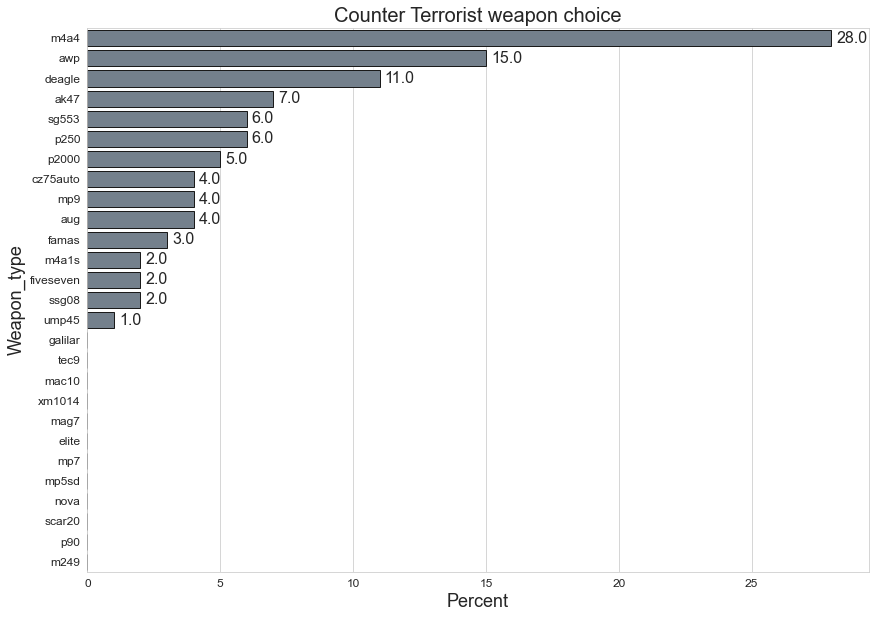

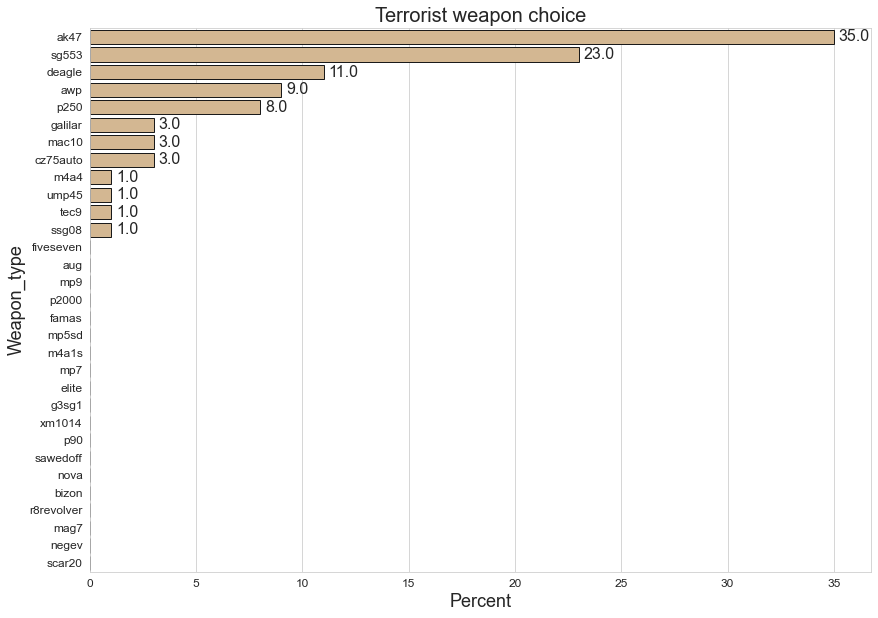

In [20]:
# CT barplot

plt.figure(figsize=(14,10))
# sns.set_color_codes('pastel')
ax = sns.barplot(x = 'Percent', y = 'Weapon_type', data = df_weapon_ct, color = "slategray", linewidth=1, edgecolor=".10")
plt.title(label='Counter Terrorist weapon choice', size=20)
plt.xlabel('Percent', size=18)
plt.ylabel('Weapon_type', size=18)

threshold = 0.01
for c in ax.containers:
    # Filter the labels
    labels = [v if v > threshold else "" for v in c.datavalues]    
    ax.bar_label(c, labels=labels, padding=5, size = 16)

ax.tick_params(labelsize=12)
plt.show();


# T barplot
plt.figure(figsize=(14,10))
ax = sns.barplot(x = 'Percent', y = 'Weapon_type', data = df_weapon_t, color = "burlywood", linewidth=1, edgecolor=".10")
plt.title(label='Terrorist weapon choice', size=20)
plt.xlabel('Percent', size=18)
plt.ylabel('Weapon_type', size=18)

threshold = 0.01
for c in ax.containers:
    # Filter the labels
    labels = [v if v > threshold else "" for v in c.datavalues]    
    ax.bar_label(c, labels=labels, padding=5, size = 16)

ax.tick_params(labelsize=12)
plt.show();

- According to the charts above, the most frequently purchased weapon in the Counter Terrorist team across all games was the M4A4 and in the Terrorist it was the AK47. Both weapons are very similar in terms of purchase category, damage, rate of fire and magazine size. When playing or watching professional CS:GO games, you can actually most often meet players with these weapons.


- The second most frequently chosen weapon looks very interesting - SG553 in the Terrorist team and AWP in the Counter Terrorist team. Both weapons have a scope sight, but they are completely different in use. The SG553 is a rifle with a 30 round magazine capacity and is definitely more mobile with optimal damage. On the other hand the AWP has the highest damage of all available weapons in CS:GO (almost always eliminates the player with one accurate shot) at the expense of mobility, rate of fire, recoil control and price. Such a different choice may be dictated by the specific role of each team - the SG553 is good for mid and long range combat to attak bombsites, while the AWP is perfect for stationary defense, waiting for the charging enemy player to come from the most likely direction on the map. 


- The third most popular weapon is the Deagle. As a pistol category weapon, it can be purchased separately from the main weapon. It deals the most damage of all pistols at the cost of recoil control, firerate, and mobility.

Let's check if pattern of players' weapon choices remains the same in only won rounds by certain team:

#### Bar plots summarizing the percentage of weapon selection across all won games

In [21]:
# Creating DataFrame containg games won only by CT team

df_ct = df[df['round_winner'].str.contains(f'^CT')]

# Creating DataFrame containg only weapon columns

df_weapon = df_ct.filter(regex = 'weapon').T
df_weapon['Total'] = df_weapon.sum(axis=1)
df_weapon = df_weapon.sort_values('Total', ascending = False)
df_weapon['Cat.'] = df_weapon.index
new = df_weapon['Cat.'].str.split(r"_", regex=True, expand=True)
df_weapon['Team'] = new[0]
df_weapon['Type'] = new[1]
df_weapon['Weapon_type'] = new[2]
df_weapon.drop(columns='Cat.', axis=1, inplace=True)

# Dropping glock and usps - both are pistols which every team starts with without need of buying it
df_weapon = df_weapon[df_weapon['Weapon_type'].str.contains('lock|usps') == False]

# Final DataFrame with most common weapons choice in won games by CT team
df_weapon_ct_won = df_weapon[df_weapon['Team'].str.contains(f'^ct')]
df_weapon_ct_won['Percent'] = round(df_weapon_ct_won['Total'] / df_weapon_ct_won['Total'].sum() * 100, 0)

In [22]:
# Creating DataFrame containg games won only by T team

df_t = df[df['round_winner'].str.contains(f'^CT')]

# Creating DataFrame containg only weapon columns

df_weapon = df_t.filter(regex = 'weapon').T
df_weapon['Total'] = df_weapon.sum(axis=1)
df_weapon = df_weapon.sort_values('Total', ascending = False)
df_weapon['Cat.'] = df_weapon.index
new = df_weapon['Cat.'].str.split(r"_", regex=True, expand=True)
df_weapon['Team'] = new[0]
df_weapon['Type'] = new[1]
df_weapon['Weapon_type'] = new[2]
df_weapon.drop(columns='Cat.', axis=1, inplace=True)

# Dropping glock and usps - both are pistols which every team starts with without need of buying it
df_weapon = df_weapon[df_weapon['Weapon_type'].str.contains('lock|usps') == False]

# Final DataFrame with most common weapons choice in won games by T team
df_weapon_t_won = df_weapon[df_weapon['Team'].str.contains(f'^t')]
df_weapon_t_won['Percent'] = round(df_weapon_t_won['Total'] / df_weapon_t_won['Total'].sum() * 100, 0)

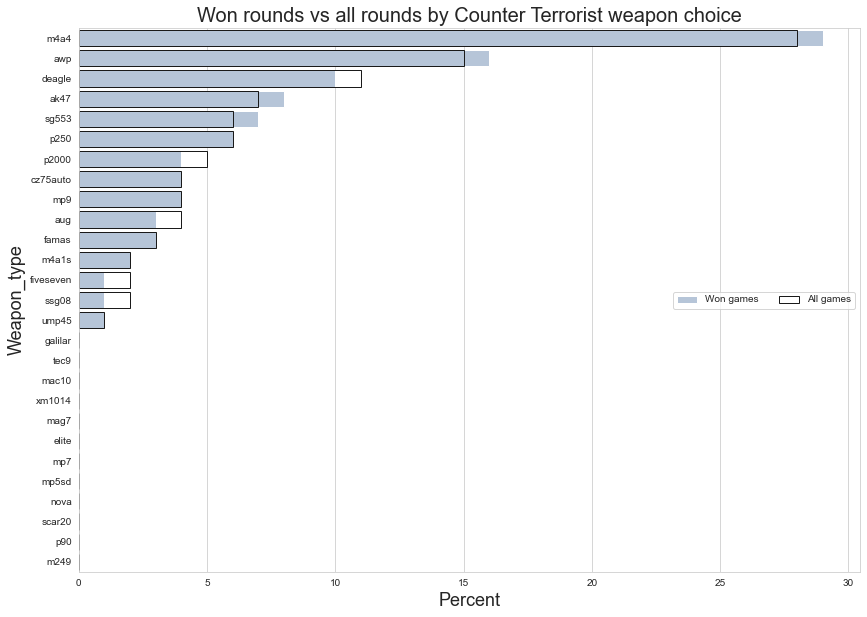

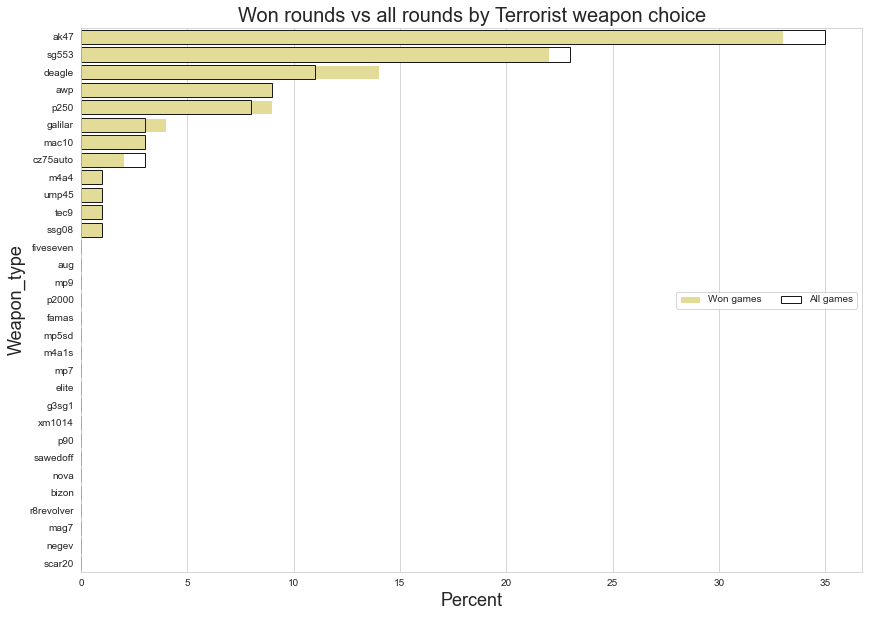

In [23]:
# CT barplot

plt.figure(figsize=(14,10))
# sns.set_color_codes('pastel')
ax1 = sns.barplot(x = 'Percent', y = 'Weapon_type', data = df_weapon_ct_won, label = "Won games", color = "lightsteelblue")
ax2 = sns.barplot(x = 'Percent', y = 'Weapon_type', data = df_weapon_ct, label = "All games", linewidth=1, facecolor=(0, 0, 0, 0), edgecolor=".10")
plt.legend (ncol = 2, loc = 5, frameon = True)
plt.title(label='Won rounds vs all rounds by Counter Terrorist weapon choice', size=20)
plt.xlabel('Percent', size=18)
plt.ylabel('Weapon_type', size=18)

threshold = 0.01
for c in ax.containers:
    # Filter the labels
    labels = [v if v > threshold else "" for v in c.datavalues]    
    ax.bar_label(c, labels=labels, padding=5, size = 16)

ax.tick_params(labelsize=12)
plt.show();

# T barplot
plt.figure(figsize=(14,10))
ax1 = sns.barplot(x = 'Percent', y = 'Weapon_type', data = df_weapon_t_won, label = "Won games", color = "khaki")
ax2 = sns.barplot(x = 'Percent', y = 'Weapon_type', data = df_weapon_t, label = "All games", linewidth=1, facecolor=(0, 0, 0, 0), edgecolor=".10")
plt.legend (ncol = 2, loc = 5, frameon = True)
plt.title(label='Won rounds vs all rounds by Terrorist weapon choice', size=20)
plt.xlabel('Percent', size=18)
plt.ylabel('Weapon_type', size=18)

threshold = 0.01
for c in ax.containers:
    # Filter the labels
    labels = [v if v > threshold else "" for v in c.datavalues]    
    ax.bar_label(c, labels=labels, padding=5, size = 16)

ax.tick_params(labelsize=12)
plt.show();

The comparison in the charts above shows that in both all and only won matches played, the same top 3 weapons remain the most common choice for both teams.

Let's see how purchasing every of the top 3 weapons affected round win rate:

#### The influence of each of the top 3 weapons on the number of wins

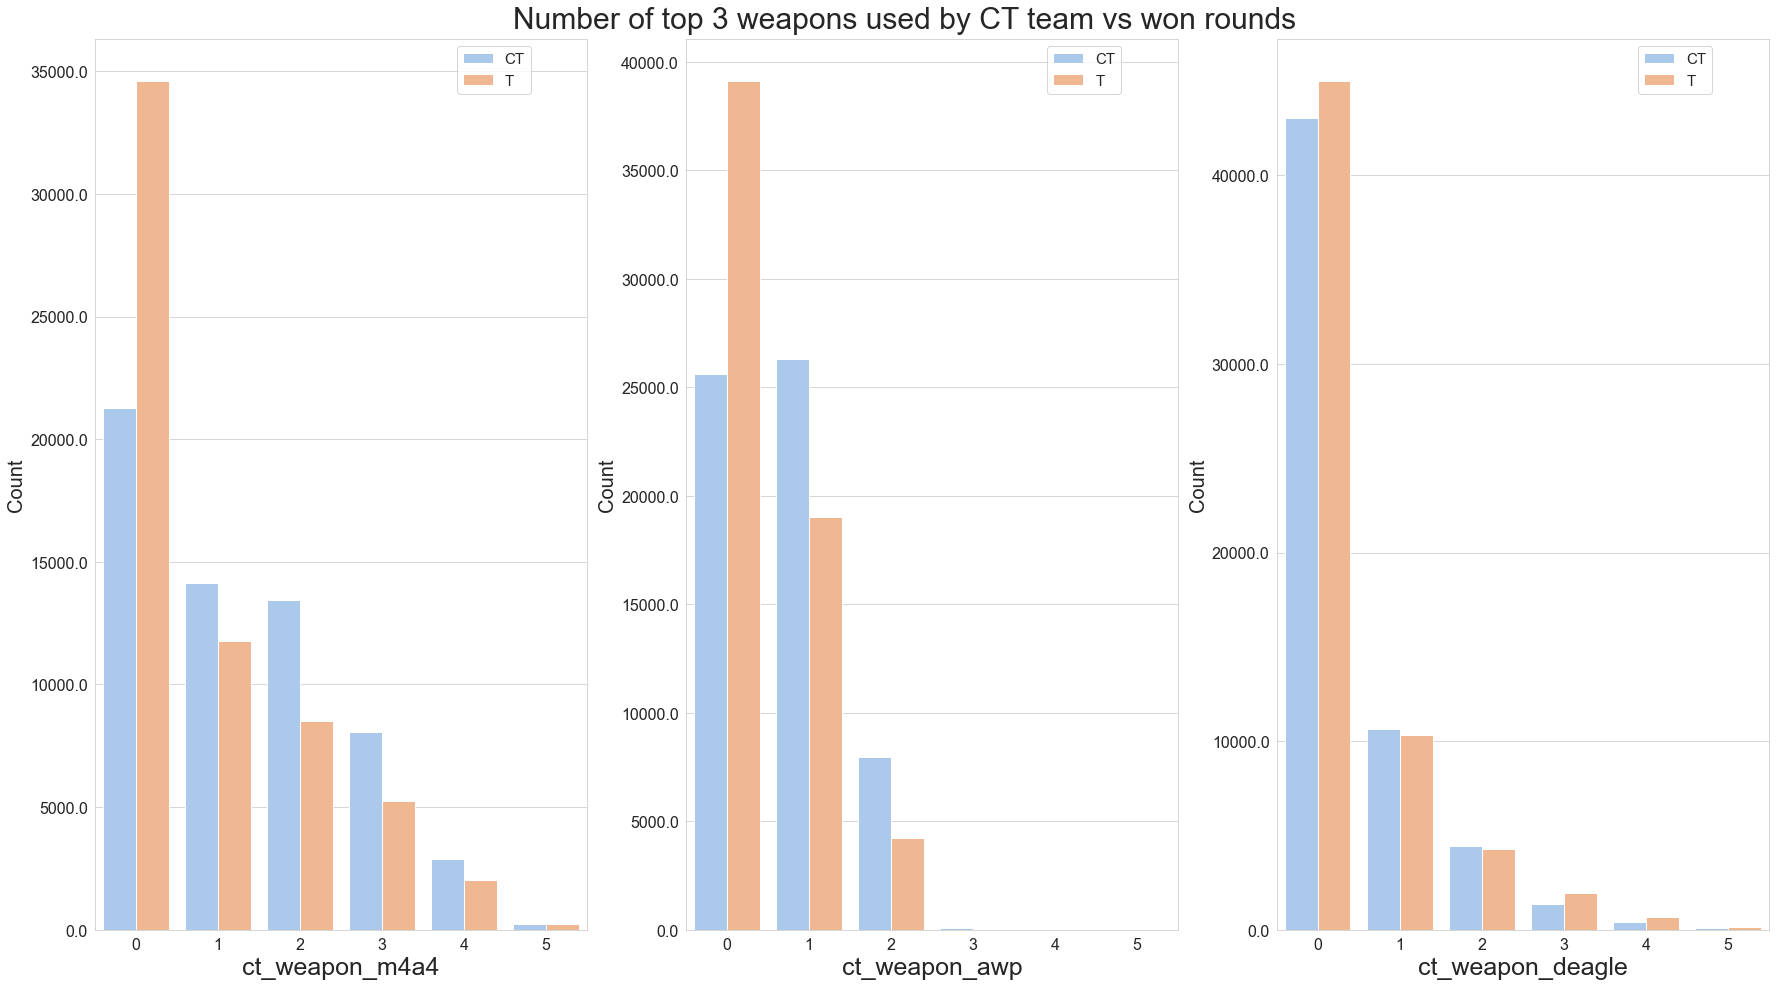

In [25]:
# Preparing separate DataFrame with top 3 bought weapons in CT team

df_weapon_top3 = df[['ct_weapon_m4a4', 'ct_weapon_awp', 'ct_weapon_deagle']]
cols = df_weapon_top3.columns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 15))

for i in range(len(cols)):
    p = sns.countplot(x = df_weapon_top3[cols[i]], hue='round_winner', ax = axes[i], data=df, palette='pastel')
    p.set_xticklabels(p.get_xticks(), size = 16)
    p.set_yticklabels(p.get_yticks(), size = 16)
    p.set_xlabel(cols[i], fontsize = 25)
    p.set_ylabel("Count", fontsize = 20)
    p.legend(fontsize=15, bbox_to_anchor=(0.9,1))

fig.suptitle("Number of top 3 weapons used by CT team vs won rounds", size=30)
plt.subplots_adjust(top=0.95)
plt.show()


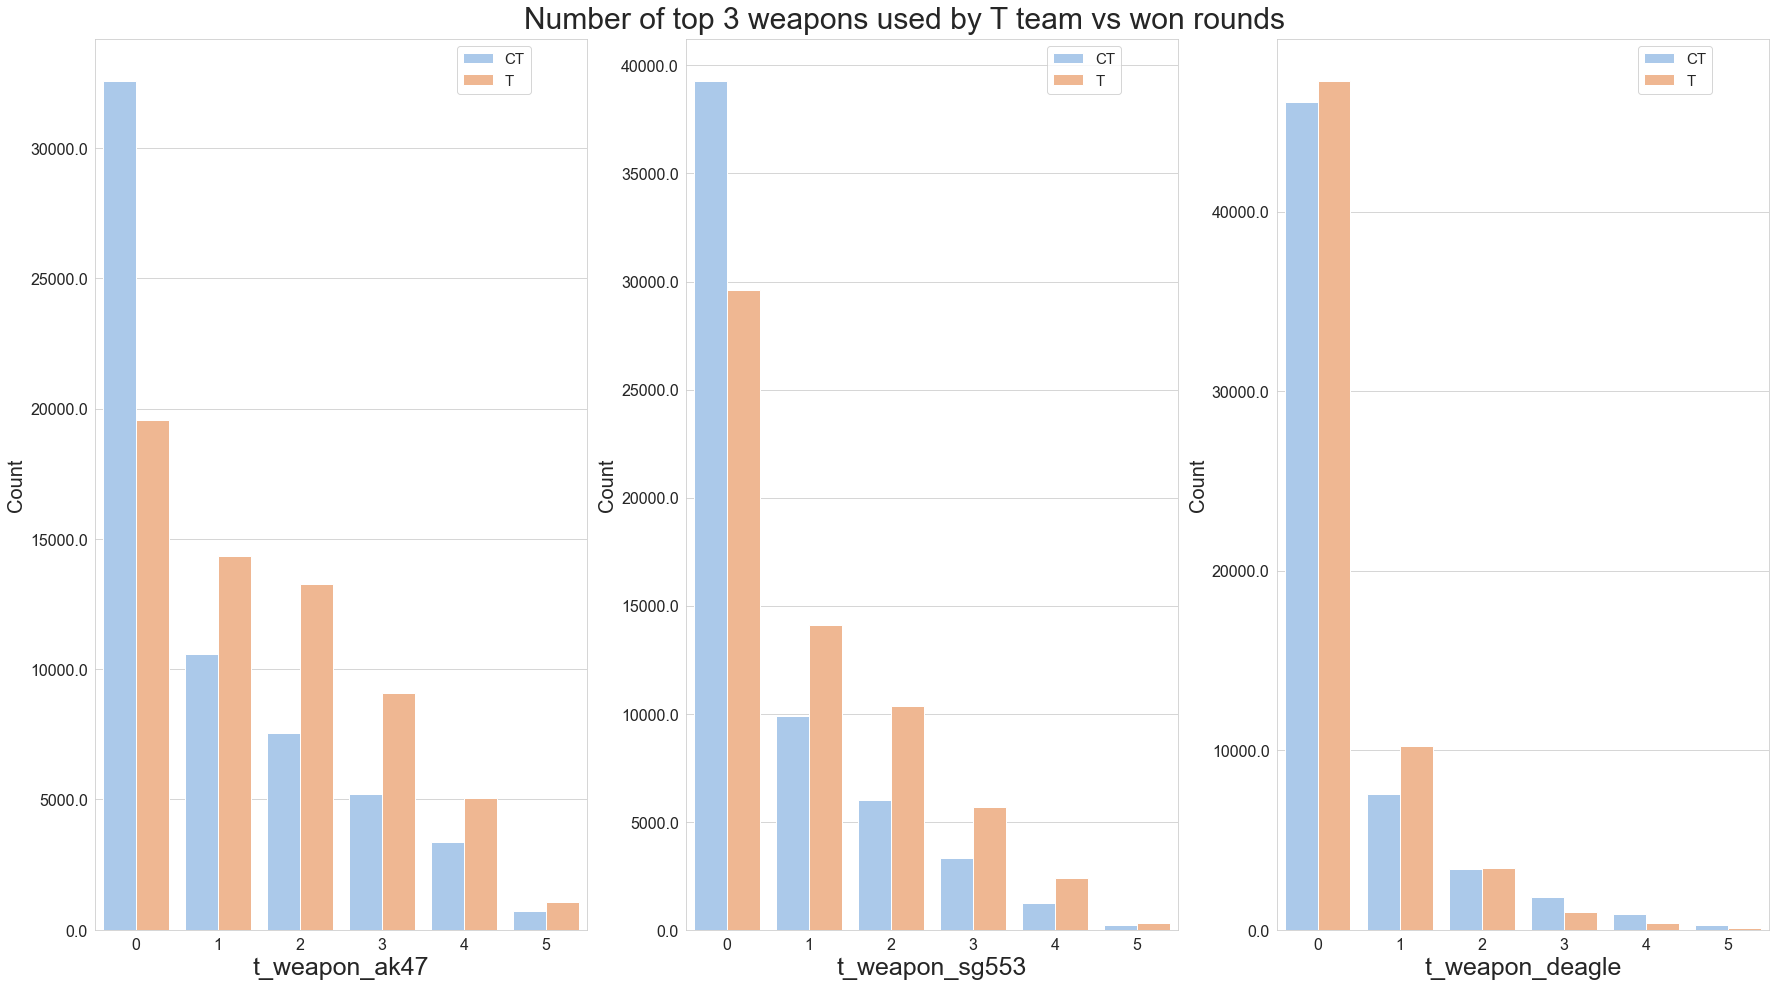

In [26]:
# Preparing separate DataFrame with top 3 bought weapons in T team

df_weapon_top3 = df[['t_weapon_ak47','t_weapon_sg553', 't_weapon_deagle']]
cols = df_weapon_top3.columns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 15))

for i in range(len(cols)):
    p = sns.countplot(x = df_weapon_top3[cols[i]], hue='round_winner', ax = axes[i], data=df, palette='pastel')
    p.set_xticklabels(p.get_xticks(), size = 16)
    p.set_yticklabels(p.get_yticks(), size = 16)
    p.set_xlabel(cols[i], fontsize = 25)
    p.set_ylabel("Count", fontsize = 20)
    p.legend(fontsize=15, bbox_to_anchor=(0.9,1))

fig.suptitle("Number of top 3 weapons used by T team vs won rounds", size=30)
plt.subplots_adjust(top=0.95)
plt.show()

- First row presenting 3 top Counter Terrorist weapons shows that having just one of M4A4 or AWP weapon in the team increased significantly win chance.


- Same case appears in second row presenting Terrorist top 3. Both AK-47 and SG563 again outweighed the odds of winning with only one team-bought weapon.


- Interestingly, the purchase of Deagle in both teams gave a similar result and mainly equalized the chances of winning the round.

### Did the choice of grenade matter?

Grenades are a type of weapon in the Counter-Strike series and they are in their own category on the buy menu. Players may hold a maximum of four grenades in Global Offensive may choose from 5 different types: high explosive grenade, decoy grenade, flashbang grenade, incendiary grenade (the counterpart for Terrorist team is molotov) and smoke grenade. Every kind has it own different purpuse and depends how good is it thrown. More information on: https://counterstrike.fandom.com/wiki/Grenades


Let's see which grenades were the most purchased in the avaliable data:

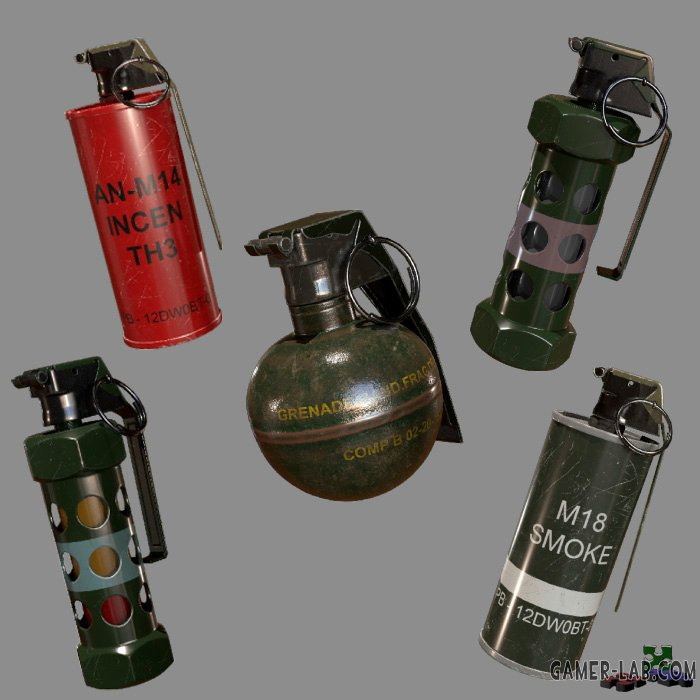

Source: https://gamer-lab.com/home/hl-lab/tmp_im/ea/ce/500x500-0100_367a8b9c9594baf3a8ae7e3ee2afd60f.jpg


https://gamer-lab.com/eng/mdl_source/Insurgency_Sandstorm_Grenades

In [27]:
# Creating DataFrame containg only grenade columns
df_grenade = df.filter(regex = 'grenade').T
df_grenade['Total'] = df_grenade.sum(axis=1)
df_grenade = df_grenade.sort_values('Total', ascending = False)
df_grenade['Cat.'] = df_grenade.index
new = df_grenade['Cat.'].str.split(r"_", regex=True, expand=True)
df_grenade['Team'] = new[0]
df_grenade['Type'] = new[1]
df_grenade['Grende_type'] = new[2]
df_grenade.drop(columns='Cat.', axis=1, inplace=True)

# Final DataFrame with most common grenda choice per team
df_grenade_ct = df_grenade[df_grenade['Team'].str.contains(f'^ct')]
df_grenade_ct['Percent'] = round(df_grenade_ct['Total'] / df_grenade_ct['Total'].sum() * 100, 1)

df_grenade_t = df_grenade[df_grenade['Team'].str.contains(f'^t')]
df_grenade_t['Percent'] = round(df_grenade_t['Total'] / df_grenade_t['Total'].sum() * 100, 1)

#### Bar plots summarizing the percentage of grenade selection across all games

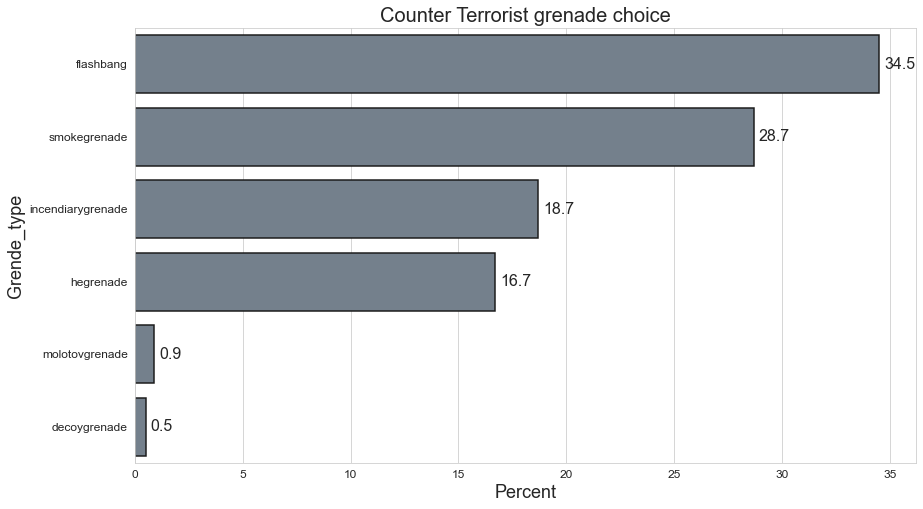

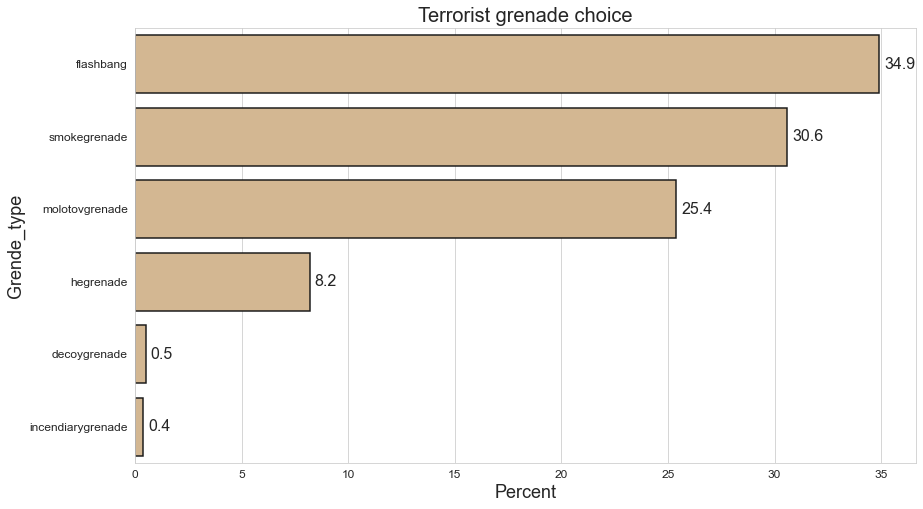

In [28]:
# CT barplot
plt.figure(figsize=(14,8))
# sns.set_color_codes('pastel')
ax = sns.barplot(x = 'Percent', y = 'Grende_type', data = df_grenade_ct, color = "slategray", linewidth=1.5, edgecolor=".10")
plt.title(label='Counter Terrorist grenade choice', size=20)
plt.tick_params(axis='both', labelsize=16)
plt.xlabel('Percent', size=18)
plt.ylabel('Grende_type', size=18)

threshold = 0.01
for c in ax.containers:
    # Filter the labels
    labels = [v if v > threshold else "" for v in c.datavalues]    
    ax.bar_label(c, labels=labels, padding=5, size = 16)

ax.tick_params(labelsize=12)
plt.show();


# T barplot
plt.figure(figsize=(14,8))
ax = sns.barplot(x = 'Percent', y = 'Grende_type', data = df_grenade_t, color = "burlywood", linewidth=1.5, edgecolor=".10")
plt.title(label='Terrorist grenade choice', size=20)
plt.tick_params(axis='both', labelsize=16)
plt.xlabel('Percent', size=18)
plt.ylabel('Grende_type', size=18)

threshold = 0.01
for c in ax.containers:
    # Filter the labels
    labels = [v if v > threshold else "" for v in c.datavalues]    
    ax.bar_label(c, labels=labels, padding=5, size = 16)

ax.tick_params(labelsize=12)
plt.show();

- According to the charts above, the most frequently purchased grenade in both teams is the flashbang which is great to blind enemies while attacking bombsites, checking rooms or defending position. Every player can hold max 2 in their own inventory.


- Second and third most popular grenade is smoke and molotov/incendinary. Both are perfect for attack or counter attack rush of enemy players, allowing to gain the necessary rotation time, giving you extra cover or providing the ability to hold a push. Every player can hold max 1 of each type in own inventory.


- Last worth mention grenade is high explosive grenade which was more often bought by Counter Terrorist team. It might by due to its properties - thrown can deal damage to multiple enemys weakining them and lowering their health points, perfect for use on grouped players (e.g. Terrorists preparing to attack in the room before the bombsite).


- To conclude, the choice of grenade type is very similar in top 3 for both teams. The proportions may have a slight deviation, but the data shows a pattern of players' choices.


Let's check if pattern of players' grenade choices remains the same in only won rounds by certain team:

#### Bar plots summarizing the percentage of grenade selection across all won games

In [29]:
# Creating DataFrame containg only grenade columns in CT won games

df_grenade = df_ct.filter(regex = 'grenade').T
df_grenade['Total'] = df_grenade.sum(axis=1)
df_grenade = df_grenade.sort_values('Total', ascending = False)
df_grenade['Cat.'] = df_grenade.index
new = df_grenade['Cat.'].str.split(r"_", regex=True, expand=True)
df_grenade['Team'] = new[0]
df_grenade['Type'] = new[1]
df_grenade['Grende_type'] = new[2]
df_grenade.drop(columns='Cat.', axis=1, inplace=True)

# Final DataFrame with most common grenade choice in CT won games
df_grenade_ct_won = df_grenade[df_grenade['Team'].str.contains(f'^ct')]
df_grenade_ct_won['Percent'] = round(df_grenade_ct_won['Total'] / df_grenade_ct_won['Total'].sum() * 100, 1)

In [30]:
# Creating DataFrame containg only grenade columns in T won games

df_grenade = df_t.filter(regex = 'grenade').T
df_grenade['Total'] = df_grenade.sum(axis=1)
df_grenade = df_grenade.sort_values('Total', ascending = False)
df_grenade['Cat.'] = df_grenade.index
new = df_grenade['Cat.'].str.split(r"_", regex=True, expand=True)
df_grenade['Team'] = new[0]
df_grenade['Type'] = new[1]
df_grenade['Grende_type'] = new[2]
df_grenade.drop(columns='Cat.', axis=1, inplace=True)

# Final DataFrame with most common grenade choice in T won games
df_grenade_t_won = df_grenade[df_grenade['Team'].str.contains(f'^t')]
df_grenade_t_won['Percent'] = round(df_grenade_t_won['Total'] / df_grenade_t_won['Total'].sum() * 100, 1)


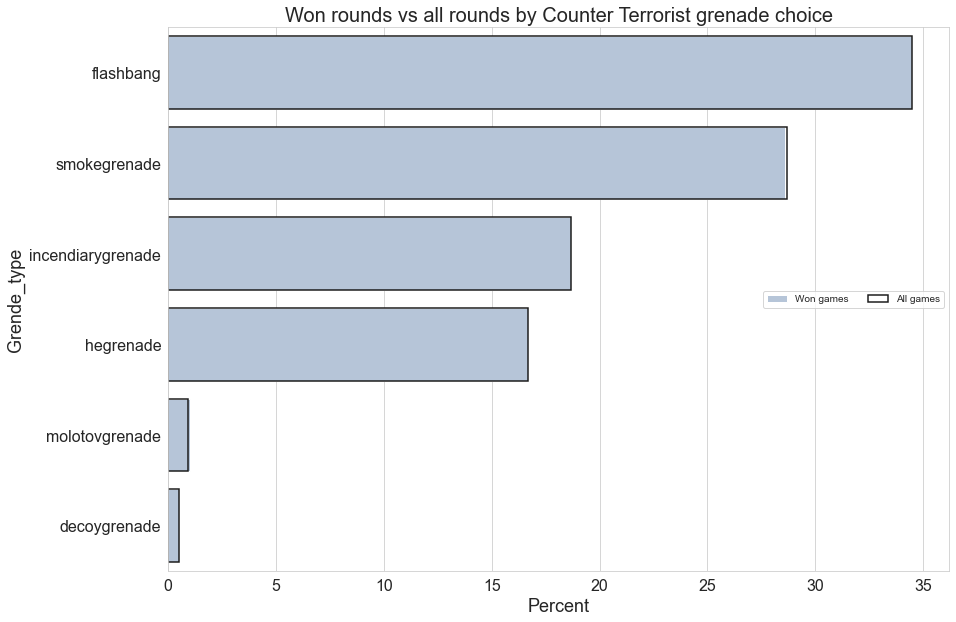

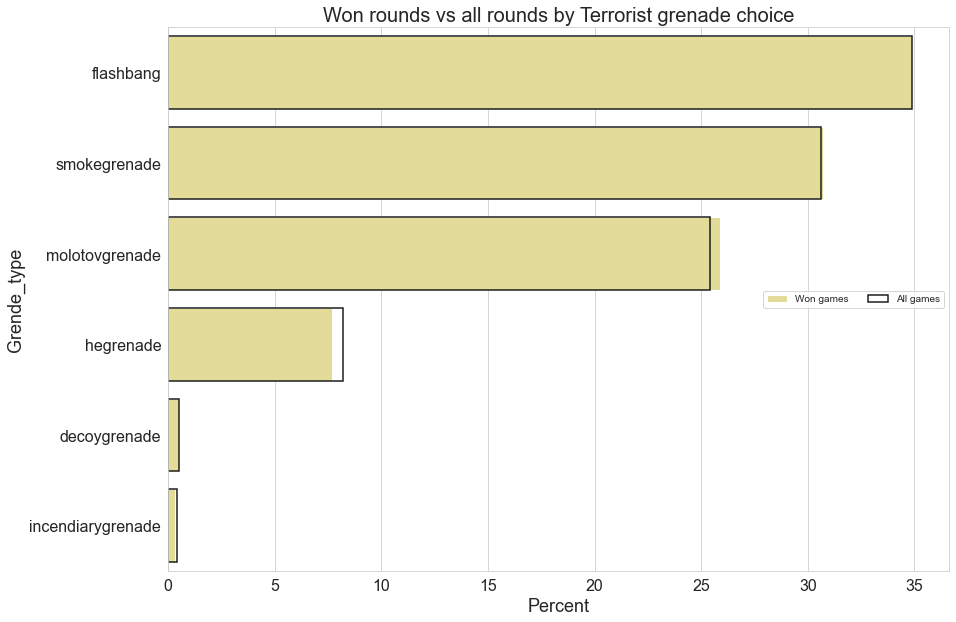

In [31]:
# CT barplot

plt.figure(figsize=(14,10))
# sns.set_color_codes('pastel')
ax1 = sns.barplot(x = 'Percent', y = 'Grende_type', data = df_grenade_ct_won, label = "Won games", color = "lightsteelblue")
ax2 = sns.barplot(x = 'Percent', y = 'Grende_type', data = df_grenade_ct, label = "All games", linewidth=1.5, facecolor=(0, 0, 0, 0), edgecolor=".10")
plt.legend (ncol = 2, loc = 5, frameon = True)
plt.title(label='Won rounds vs all rounds by Counter Terrorist grenade choice', size=20)
plt.tick_params(axis='both', labelsize=16)
plt.xlabel('Percent', size=18)
plt.ylabel('Grende_type', size=18)

# threshold = 0.01
for c in ax.containers:
    # Filter the labels
    labels = [v if v > threshold else "" for v in c.datavalues]    
    ax.bar_label(c, labels=labels, padding=5, size = 16)

ax.tick_params(labelsize=12)
plt.show();

# T barplot
plt.figure(figsize=(14,10))
ax1 = sns.barplot(x = 'Percent', y = 'Grende_type', data = df_grenade_t_won, label = "Won games", color = "khaki")
ax2 = sns.barplot(x = 'Percent', y = 'Grende_type', data = df_grenade_t, label = "All games", linewidth=1.5, facecolor=(0, 0, 0, 0), edgecolor=".10")
plt.legend (ncol = 2, loc = 5, frameon = True)
plt.title(label='Won rounds vs all rounds by Terrorist grenade choice', size=20)
plt.tick_params(axis='both', labelsize=16)
plt.xlabel('Percent', size=18)
plt.ylabel('Grende_type', size=18)

# threshold = 0.01
for c in ax.containers:
    # Filter the labels
    labels = [v if v > threshold else "" for v in c.datavalues]    
    ax.bar_label(c, labels=labels, padding=5, size = 16)

ax.tick_params(labelsize=12)
plt.show();

- The comparison in the graphs above shows that both in all rounds and only in won rounds, the same top 3 grenades remain the most common pick for both teams with similar proportions.

Let's see if buying grenades increased chances of winning round:

#### The influence of each of the top 3 grenades on the number of wins

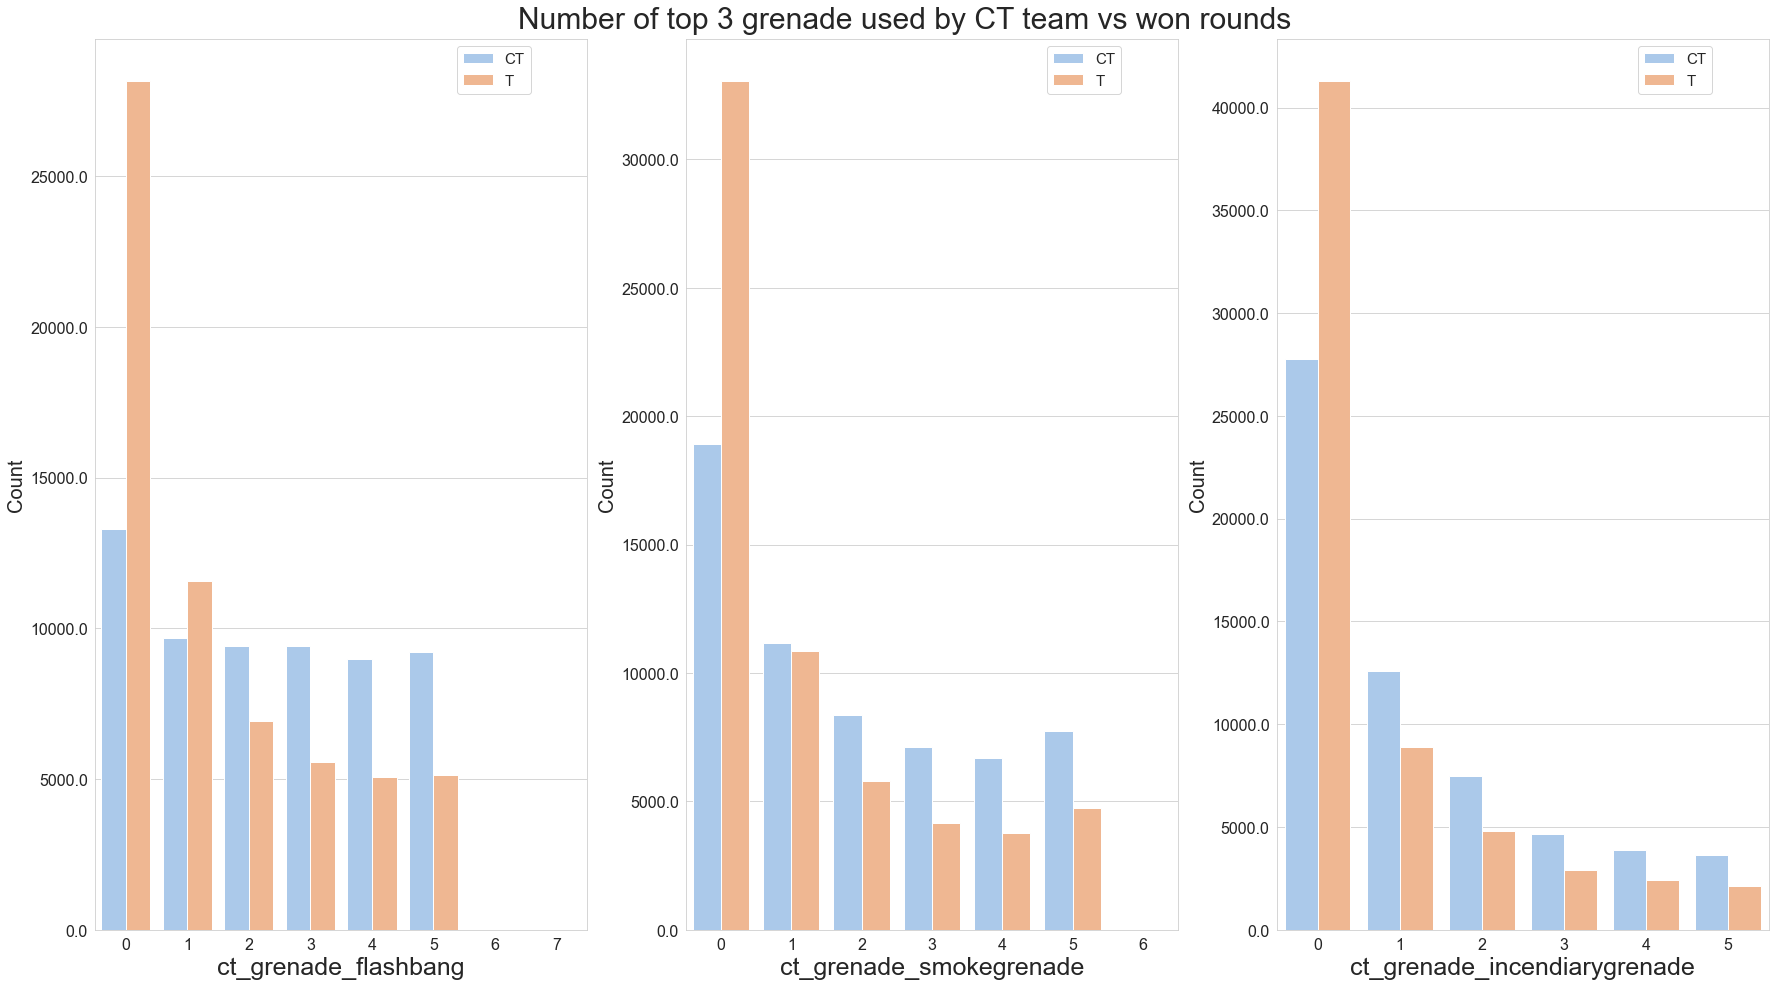

In [32]:
# Preparing separate DataFrame with top 3 bought grenades in CT team

df_grenade_top3 = df[['ct_grenade_flashbang', 'ct_grenade_smokegrenade', 'ct_grenade_incendiarygrenade']]
cols = df_grenade_top3.columns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 15))

for i in range(len(cols)):
    p = sns.countplot(x = df_grenade_top3[cols[i]], hue='round_winner', ax = axes[i], data=df, palette='pastel')
    p.set_xticklabels(p.get_xticks(), size = 16)
    p.set_yticklabels(p.get_yticks(), size = 16)
    p.set_xlabel(cols[i], fontsize = 25)
    p.set_ylabel("Count", fontsize = 20)
    p.legend(fontsize=15, bbox_to_anchor=(0.9,1))

fig.suptitle("Number of top 3 grenade used by CT team vs won rounds", size=30)
plt.subplots_adjust(top=0.95)
plt.show()


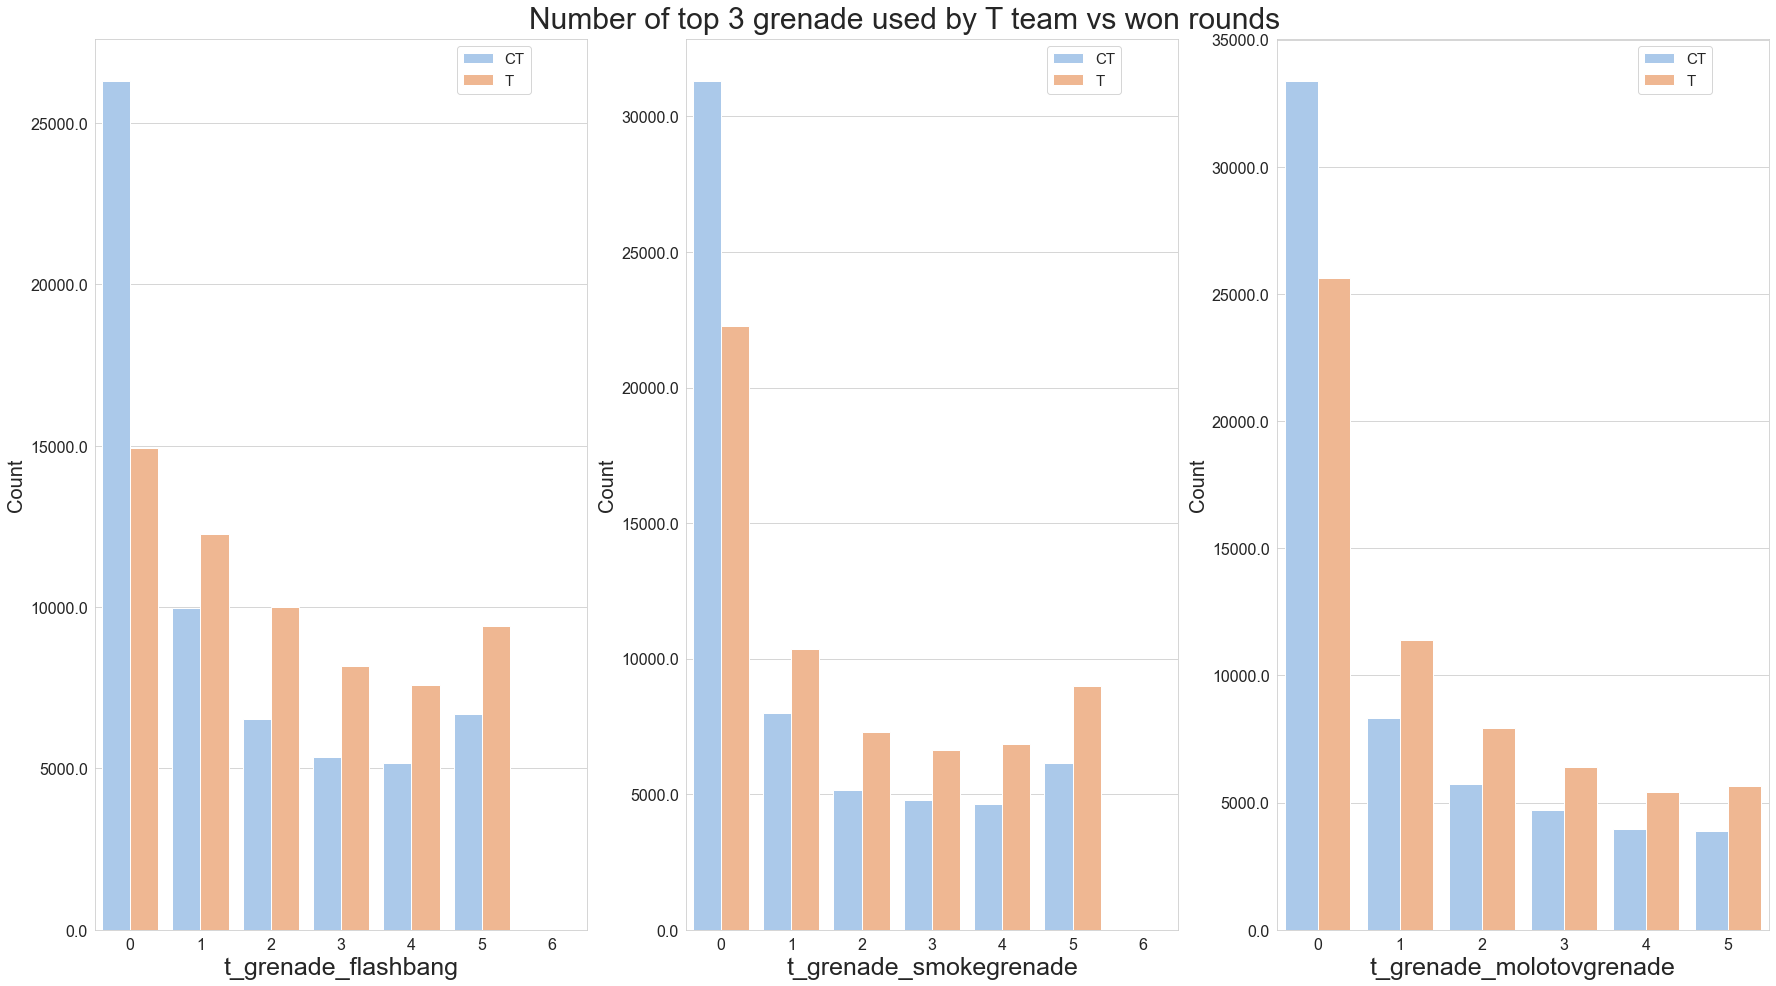

In [33]:
# Preparing separate DataFrame with top 3 bought grenades in T team

df_grenade_top3 = df[['t_grenade_flashbang', 't_grenade_smokegrenade', 't_grenade_molotovgrenade']]
cols = df_grenade_top3.columns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 15))

for i in range(len(cols)):
    p = sns.countplot(x = df_grenade_top3[cols[i]], hue='round_winner', ax = axes[i], data=df, palette='pastel')
    p.set_xticklabels(p.get_xticks(), size = 16)
    p.set_yticklabels(p.get_yticks(), size = 16)
    p.set_xlabel(cols[i], fontsize = 25)
    p.set_ylabel("Count", fontsize = 20)
    p.legend(fontsize=15, bbox_to_anchor=(0.9,1))

fig.suptitle("Number of top 3 grenade used by T team vs won rounds", size=30)
plt.subplots_adjust(top=0.95)
plt.show()


- From the charts above, we can see that Counter Terrorist required having a minimum of two flashbang and smoke grenade, while  Terrorist team required at least one of each listed grenade type to increase the odds of winning a round.


- In the case of incendiary and molotov grenades, it can be seen that with just one purchase, the ratio of the number of rounds won was higher for each team.


Despite the positive results of the grenade analysis, it cannot be unequivocally stated that the purchase of a grenade was decisive in winning the round. CS:GO is a complex game but as an FPS (First Person Shooter), being able to use better weapons will have a relatively greater chance of winning a round than anything else. However, buying and using them in a round definitely affects its course. In the end, a lot depends on the skill of the player.

### Summary of EDA

**Summarizing the most important conclusions from the above EDA analysis, we can assume that in the case of playing on the Counter Terrorist side, the greatest statistical chances of winning the round could be when:**
- the game is on "de_nuke" and "de_train" maps;
- there are at least two defuse kits in the team;
- the settlement of the match will take place within two minutes of the match;
- the team has M4A4, AWP and optionally the Deagle pistol;
- the team has 2 or more flashbang grenade and minimum 1 smoke and incendiary grenade.


**On the other hand, when we play on the side of the Terrorists, the greatest statistical chances of winning the round could give us:**
- playing on the maps "de_inferno" and "de_dust2";
- planting C4;
- the settlement of the match should take place in the last minute of the match;
- the team has weapons AK47, SG553 and optionally the Deagle pistol;
- the team has 1 or more flashbang, smoke and incendiary grenades.

## Feature encoding

In [218]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [219]:
# Split X and y
y = df.round_winner
X = df.drop(columns=['round_winner', 'time_left_intervals'], axis=1)

In [220]:
counter = Counter(y)
print(counter)

Counter({'T': 62406, 'CT': 60004})


In [221]:
# Manual encoding for easier data description
y = y.replace({'T' : 0, 'CT' : 1})

# def label_encoder(y):
#     y_encoded = LabelEncoder().fit_transform(y)
#     return y_encoded

# y = label_encoder(y) #Alternative solution

def encode_inputs(X, select_col):
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
    X_encoded = pd.DataFrame(ohe.fit_transform(X[select_col]))
    X_encoded.columns = ohe.get_feature_names_out(select_col)
    X_encoded.index = X.index
    return X_encoded

cols = ['map', 'bomb_planted']
X_encoded = encode_inputs(X, cols)
X_numerical = X.drop(cols, axis=1)
X = pd.concat([X_numerical, X_encoded], axis=1)

## Preprocessing

In [223]:
from sklearn.model_selection import train_test_split
from collections import Counter

In [224]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=y)

In [225]:
# Checking the class distribution of the training dataset
counter = Counter(y_test)
print(counter)

Counter({0: 12481, 1: 12001})


- Data is balanced in same way as total DataFrame thanks to stratify parameter

### Feature scaling

In [227]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Scaling train set
X_train = scaler.fit_transform(X_train)

# Scaling test set
X_test = scaler.transform(X_test)

In [228]:
X_train.shape, y_train.shape

((97928, 98), (97928,))

## Machine learning - predict which team is going to win

### Imports

In [229]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, auc, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

### Gridsearch for best parameters

As the next step of this notebook, I will try to train the machine learning algorithm to predict which team will win the match based on the characteristics from the dataset. For this case i will use few of most popular supervised machine learning algorithms:

- **Logistic Regression**
- **Naive Bayes**
- **Decision Tree Classifier**
- **Random Forest Classifier**
- **XGB Classifier**
- **KNeigbors Classifier**

Nowdays, depending on the estimator being used, there are many different hyperparameters that can be tunned to achieve best results. With help comes the **GridSearchCV**. It is a library function that is a member of sklearn's model_selection package and is a very useful tool to fine tune the parameters of your model by looping through predefined hyperparameters and fit your estimator (model) on your training set. As a result, we can select the best parameters from the listed hyperparameters.

In [230]:
#Prepering input for GridSearchCV

grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[30, 50, 70],'criterion':['gini','entropy'],'random_state':[0]}]),
               (XGBClassifier(), [{'learning_rate': [0.005, 0.01, 0.05], 'eval_metric': ['error']}]),
               (KNeighborsClassifier(),[{'n_neighbors':[3, 5, 7], 'metric': ['euclidean', 'manhattan', 'minkowski']}]),
              ]

In [231]:
# Grid searching best parameters
accuracies_train = {}

for i,j in grid_models:
    grid = GridSearchCV(estimator=i, param_grid=j, scoring='accuracy', cv=5)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    accuracies_train[(str(i)).split('(')[0]] = best_accuracy*100
    print('{}:\nBest Accuracy : {:.2f}%'.format(i, best_accuracy*100))
    print('Best Parameters : ', best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 74.87%
Best Parameters :  {'C': 0.5, 'random_state': 0}

----------------

GaussianNB():
Best Accuracy : 64.24%
Best Parameters :  {'var_smoothing': 1e-09}

----------------

DecisionTreeClassifier():
Best Accuracy : 81.08%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 86.47%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 70, 'random_state': 0}

----------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_del

Based on the accuracy scores achieved by each machine learning algorithm, we see that some of them handle this dataset better and some of them don't. As the next step, I will take all models and test them against a test Dataset to see results of prediction.

### Test preditction with tuned models

Thanks to Grid Search, we got the best parameters for our models which we can now pass to final models and use it with our test Dataset. For a more detailed verification of the correctness of the prediction, we will also check the following parameters:

**True Positives (TP)** - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.

**True Negatives (TN)** - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.

**False Positives (FP)** – When actual class is no and predicted class is yes.

**False Negatives (FN)** – When actual class is yes but predicted class in no.

**Accuracy** - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.
                 
                 Accuracy = TP+TN/TP+FP+FN+TN

**Precision** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
                 
                 Precision = TP/TP+FP

**Recall (Sensitivity)** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.
                 
                 Recall = TP/TP+FN

**F1 score** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

                 F1 Score = 2(Recall Precision) / (Recall + Precision)


**AUC - ROC Curve** - is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.


**Precision-Recall Curve** - shows the tradeoff between precision and recalls for different thresholds. It is often used in situations where classes are heavily imbalanced. For example, if an observation is predicted to belong to the positive class at probability > 0.5, it is labeled as positive. However, we could choose any probability threshold between 0 and 1. A precision-recall curve helps to visualize how threshold affects classifier performance.


It is desired that the algorithm should have both high precision, and high recall. However, most machine learning algorithms often involve a trade-off between the two. A good PR curve has greater AUC (area under curve). It is important to note that the classifier that has a higher AUC on the ROC curve will always have a higher AUC on the PR curve as well.

#### RandomForestClassifier

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12481
           1       0.87      0.88      0.88     12001

    accuracy                           0.88     24482
   macro avg       0.88      0.88      0.88     24482
weighted avg       0.88      0.88      0.88     24482

ROC AUC score:  0.951291429183508
Accuracy Score:  0.8797075402336411


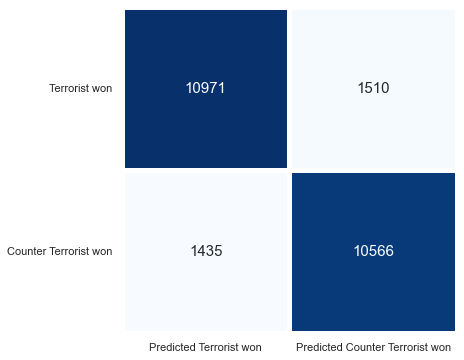

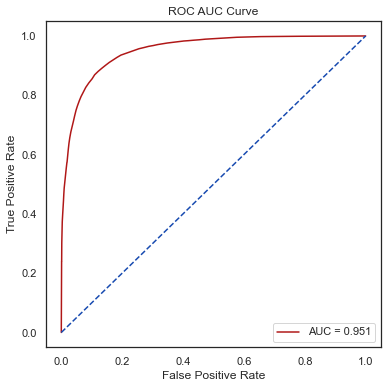

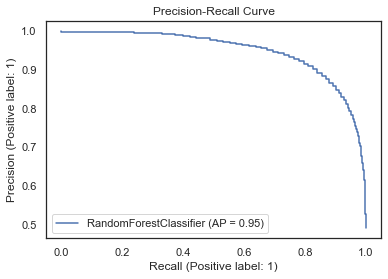

In [233]:
#Fitting RandomForestClassifier Model with best params
accuracies_test = {}

model = RandomForestClassifier(criterion= 'entropy', n_estimators= 70, random_state= 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: ',roc_auc_score(y_test, y_prob))
print(f'Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Terrorist won', 'Counter Terrorist won'], xticklabels = ['Predicted Terrorist won', 'Predicted Counter Terrorist won'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies_test['RandomForestClassifier'] = acc


sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

# Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

#### KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12481
           1       0.89      0.89      0.89     12001

    accuracy                           0.89     24482
   macro avg       0.89      0.89      0.89     24482
weighted avg       0.89      0.89      0.89     24482

ROC AUC score:  0.9435856275390774
Accuracy Score:  0.8893472755493832


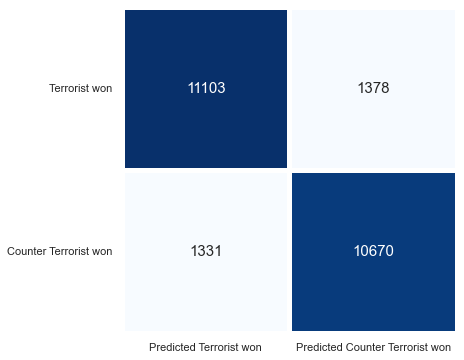

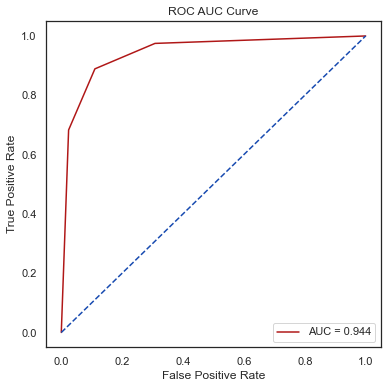

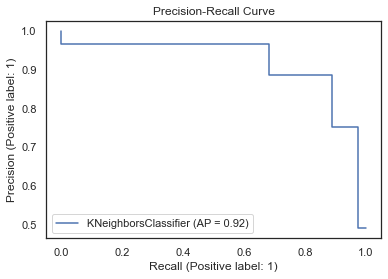

In [234]:
#Fitting KNeighborsClassifier Model with best params

model = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: ',roc_auc_score(y_test, y_prob))
print(f'Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Terrorist won', 'Counter Terrorist won'], xticklabels = ['Predicted Terrorist won', 'Predicted Counter Terrorist won'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies_test['KNeighborsClassifier'] = acc


sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

# Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

#### DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.82      0.83      0.83     12481
           1       0.82      0.82      0.82     12001

    accuracy                           0.82     24482
   macro avg       0.82      0.82      0.82     24482
weighted avg       0.82      0.82      0.82     24482

ROC AUC score:  0.8239151991987742
Accuracy Score:  0.821869128339188


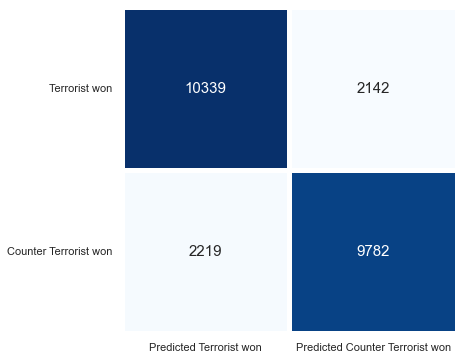

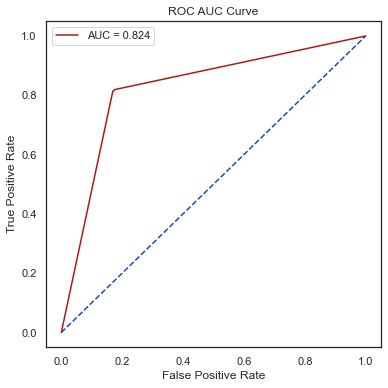

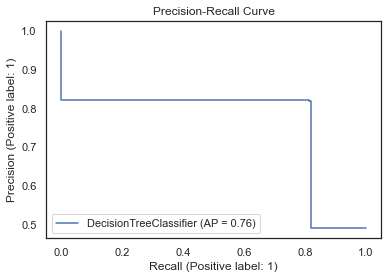

In [235]:
#Fitting DecisionTreeClassifier Model with best params

model = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: ',roc_auc_score(y_test, y_prob))
print(f'Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Terrorist won', 'Counter Terrorist won'], xticklabels = ['Predicted Terrorist won', 'Predicted Counter Terrorist won'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies_test['DecisionTreeClassifier'] = acc


sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

# Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

#### LogisticRegression

              precision    recall  f1-score   support

           0       0.76      0.74      0.75     12481
           1       0.74      0.76      0.75     12001

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482

ROC AUC score:  0.8481603578143719
Accuracy Score:  0.7521852789804755


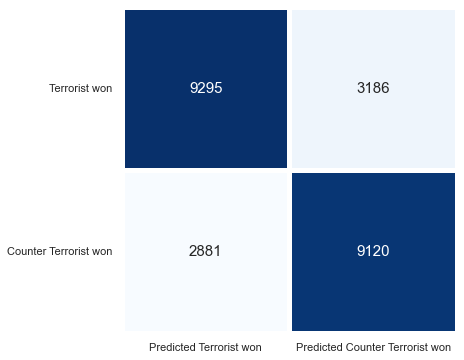

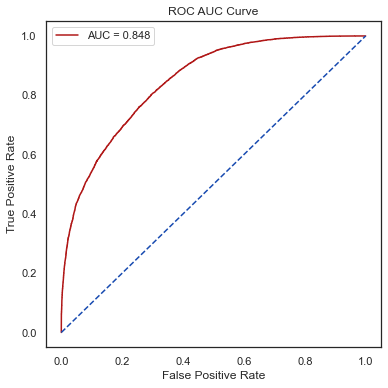

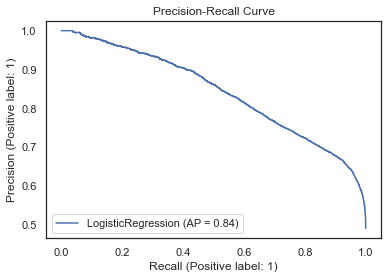

In [236]:
#Fitting LogisticRegression Model with best params

model = LogisticRegression(C=0.75, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: ',roc_auc_score(y_test, y_prob))
print(f'Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Terrorist won', 'Counter Terrorist won'], xticklabels = ['Predicted Terrorist won', 'Predicted Counter Terrorist won'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies_test['LogisticRegression'] = acc


sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

# Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

array([11010,  1471], dtype=int64)

#### XGBoost

              precision    recall  f1-score   support

           0       0.81      0.72      0.76     12481
           1       0.74      0.82      0.78     12001

    accuracy                           0.77     24482
   macro avg       0.77      0.77      0.77     24482
weighted avg       0.77      0.77      0.77     24482

ROC AUC score:  0.8712621469776967
Accuracy Score:  0.7692182011273588


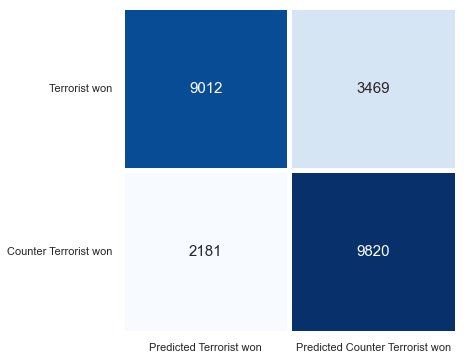

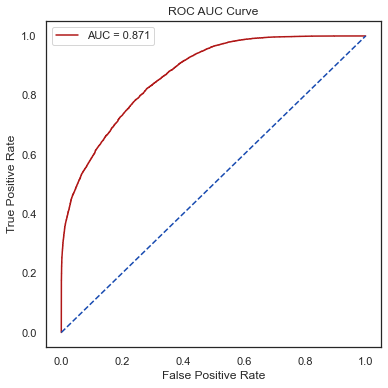

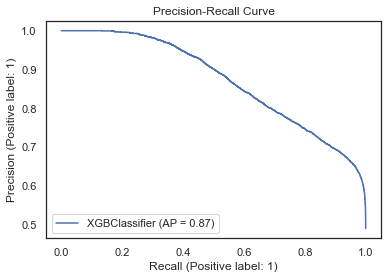

In [237]:
#Fitting XGBClassifier Model with best params

model = XGBClassifier(eval_metric= 'error', learning_rate= 0.05)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: ',roc_auc_score(y_test, y_prob))
print(f'Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Terrorist won', 'Counter Terrorist won'], xticklabels = ['Predicted Terrorist won', 'Predicted Counter Terrorist won'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies_test['XGBClassifier'] = acc



sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

# Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

#### GaussianNB

              precision    recall  f1-score   support

           0       0.61      0.88      0.72     12481
           1       0.77      0.41      0.53     12001

    accuracy                           0.65     24482
   macro avg       0.69      0.64      0.63     24482
weighted avg       0.69      0.65      0.63     24482

ROC AUC score:  0.7635342509214957
Accuracy Score:  0.6494158973940037


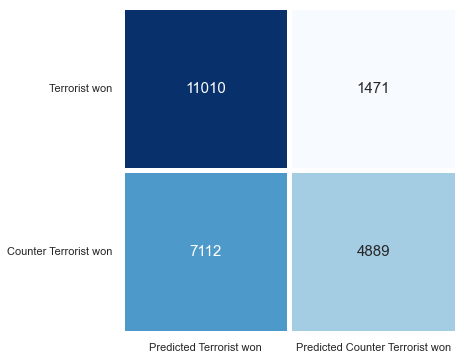

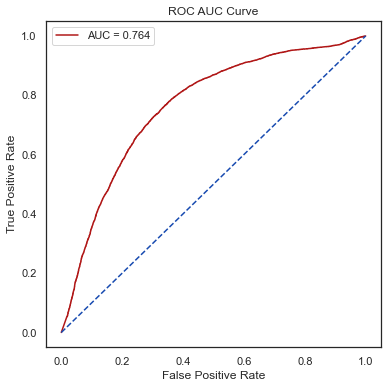

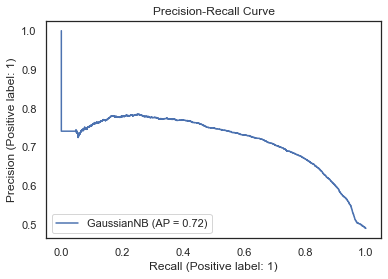

In [238]:
#Fitting GaussianNB Model with best params

model = GaussianNB(var_smoothing= 1e-09)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: ',roc_auc_score(y_test, y_prob))
print(f'Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Terrorist won', 'Counter Terrorist won'], xticklabels = ['Predicted Terrorist won', 'Predicted Counter Terrorist won'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies_test['GaussianNB'] = acc



sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

# Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

### Summary

In [239]:
df_acc_train = pd.DataFrame(accuracies_train.items() , columns=['Model', 'Accuracy Train'])
df_acc_test = pd.DataFrame(accuracies_test.items() , columns=['Model', 'Accuracy Test'])

df_models = pd.merge(left=df_acc_train, right=df_acc_test, on="Model", how="outer")
df_models.sort_values(by= ['Accuracy Test'], inplace= True, ascending= False, ignore_index=True)
df_models

Model  Accuracy Train  Accuracy Test
0    KNeighborsClassifier       86.395105      88.934728
1  RandomForestClassifier       86.473732      87.970754
2  DecisionTreeClassifier       81.077931      82.186913
3           XGBClassifier       77.055589      76.921820
4      LogisticRegression       74.874392      75.218528
5              GaussianNB       64.239990      64.941590

**The CS:GO Round Winner Classification** contains incredibly interesting and insightful data. Due to the large number of features and records, I could perform various EDA analysis, perform feature engineering, do features encoding operations and preprocess the data. That prepared everything for best part which is machine learning. With help of GridSearch I managed to experimented with various classification models to see how well they performed on the dataset. Looking at accuracy, roc, precision, and recall score, I obtained pretty good results.

For the above machine learning process, it concludes that **KNeighbors** and **Random Forest Classifier** turned out to be the best matching models for our dataset with these specified steps. With choosen hyperparameters, the highest accuracy of prediction has the **KNeighbors Classifier** **88.93%** with AUC of **0.944** and F1 score of **0.89**. A 2% difference in accuracy between the test and training datasets is relatively small and acceptable. It also shows that the model is not significantly overfitting the training data, indicates that has learned the underlying patterns well and can generalize to new data points.
